# Machine Learning Project 2022/2023 - Group 60 <img align='right' width='100' height='125' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>





### Group 60 Members:
Beatriz Carmo - 20220685<br>
João Malho - 20220696<br>
Lizaveta Baryionak - 20220667<br>
Marta Antunes - 20221094<br>
Tomás Silva - 20221639

## Table of Contents

* [1. Data Gathering](#datagathering)
    * [1.1 Import Libraries](#importlibraries)
    * [1.2 Import Datasets](#importdatasets)
* [2. Feature Engineering](#featureengineering)
    * [2.1 Analysis over Data](#AnalysisTrainData)
        * [2.1.1 Duplicated Data](#DuplicatedData)
        * [2.1.2 Missing Values](#NullData)
        * [2.1.3 Inconsistent Values Check](#inconsistentData)
    * [2.2 Variables Distribution](#VariablesDistribution)
        * [2.2.1 Features Definition](#featuresDefin)
        * [2.2.2 Numeric Features - BoxPlots](#NumericFeatures)
        * [2.2.3 Numeric Features - Histograms](#NumericFeaturesHist)
        * [2.2.4 Redundancy over Features](#Redundancy)
    * [2.3 Removing Outliers](#OutlierRemove)
        * [2.3.1 Z-Score Method](#ZScore)
        * [2.3.2 Interquartile Range Method](#IQR)
        * [2.3.3 Manual Method](#ManualMethod)
        * [2.3.4 Outliers Conclusion](#OutConclusion)
    * [2.4 Categorical Features Enconding](#Enconding) 
        * [2.4.1 Boolean Features to Binary](#BoolToBinary)
        * [2.4.2 Dummy Encoding](#DummyEnco)
* [3. Feature Selection](#FeaureSelection)
    * [3.1 Feature Importance](#FeatureImportance)
* [4. Model Creation](#ModelCreation)
    * [4.1 Logistic Regression](#LogisticRegr)
    * [4.2 Decision Tree](#DecisionTree)
    * [4.3 Random Forest](#RandomForest)
* [5. Data Normalization](#Normalization)
    * [5.1 MLP Classifier](#MLP)
    * [5.2 Min Max Scaler](#MinMaxSc)
        * [5.2.1 Rescale Between [-1,1]](#RescaleBetwe)
    * [5.3 The RobustScaler](#RobustSc)
    * [5.4 Normalization Conclusion](#NormalConclusi)
* [6. Normalized Model Creation](#NormalizedModelCreation)
    * [6.1 K Nearest Neighbors Model (KNN)](#KNN)
    * [6.2 Neural Network](#NeuralNet)
    * [6.3 Gradient Boosting](#Gradient)
* [7. Accuracies](#Accuracies)
* [8. Roc Curves Analysis](#Roc)
* [9. Model Deployment](#Deployment)


***

<a class="anchor" id="datagathering">

# 1. Data Gathering
    
</a>
<ul>
    <li>Import necessary libraries, numpy, pandas, matplotlib, seaborn and sklearn which are in the majority of the projects the main ones used</li>
    <li> After import the necessary files (train and test one) will turn the analysis easier and more precise if we merge then in two distinct tables</li>   
</ul>



***

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [1]:
%autosave 90

# Basic libraries: numpy and pandasfor data handling, pyplot 
# and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from mlxtend.plotting import plot_decision_regions

# Data split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Scaling methods and categorical variable encoder
from sklearn.preprocessing import LabelEncoder

# Model selection 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score ,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Data Normalization
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Addicional 
from datetime import datetime
from datetime import date

# setting visual theme
sns.set_theme(style = 'white')


Autosaving every 90 seconds


<a class="anchor" id="importdatasets">

## 1.2. Import Datasets

</a>

In [2]:
# Training data

train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

# Testing data

test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')


In [3]:
# Join all the trainning data in 1 dataframe 

#train_demo.set_index('PatientID')
#train_habits.set_index('PatientID')
#train_health.set_index('PatientID')

train_full = pd.merge(pd.merge(train_demo, train_habits, on = 'PatientID'), train_health, on='PatientID')
#train_full.set_index('PatientID', inplace=True)
train_df = train_full.copy()

In [4]:
# Join all the testing data in 1 dataframe

#test_demo.set_index('PatientID')
#test_habits.set_index('PatientID')
#test_health.set_index('PatientID')

test_full = pd.merge(pd.merge(test_demo, test_habits, on='PatientID'), test_health, on='PatientID')
#test_full.set_index('PatientID', inplace=True)
test_df = test_full.copy()

In [5]:
# Checking how the training dataframe is

train_df.head().style

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline diabetes
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline diabetes


In [6]:
# Checking how the testing dataframe is

train_df.head().style

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline diabetes
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline diabetes


***
<a class="anchor" id="featureengineering">

# 2. Feature Engineering 
    
</a>
   
* Data Preprocessing for Train and Test Data
<ul>
    <li>Check Null and cleaning it</li>
    <li>Check duplicated and cleaning it</li>
    <li>Check the existance of Outliers</li>
    <li>Check the spearman correlation between features</li>
    <li>Change the categorical features into numeric features</li>
</ul>

***   

***
<a class="anchor" id="AnalysisData">

## 2.1 __Analysis over Data__ 

</a>
    
This process consistes in analysing suplyied data and work it in order to get a clean and consistente dataset.

***

In [7]:
#checking the shape of each data set
print('There are ', train_df.shape[0], 'rows and ', train_df.shape[1], 'columns on the train set.')
print('There are ', test_df.shape[0], 'rows and ', test_df.shape[1], 'columns on the test set.')

There are  800 rows and  19 columns on the train set.
There are  225 rows and  18 columns on the test set.


In [8]:
#checking numeric stats
train_df[train_df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,800.0,1513.99875,300.874630,1001.0,1247.50,1519.5,1777.25,2024.0
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.00,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.00,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.00,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.00,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.00,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.00,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.00,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.00,30.0


In [9]:
#checking numeric stats
test_df[test_df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,225.0,1504.893333,278.679375,1000.0,1287.0,1495.0,1739.0,2021.0
Birth_Year,225.0,1967.644444,9.438607,1945.0,1961.0,1967.0,1975.0,1988.0
Height,225.0,167.422222,8.014743,151.0,162.0,167.0,173.0,180.0
Weight,225.0,67.800000,12.758750,42.0,57.0,68.0,77.0,97.0
High_Cholesterol,225.0,252.408889,51.727410,135.0,217.0,244.0,278.0,421.0
Blood_Pressure,225.0,133.595556,18.983098,94.0,120.0,130.0,144.0,200.0
Mental_Health,225.0,17.546667,4.902514,3.0,15.0,18.0,22.0,27.0
Physical_Health,225.0,5.377778,6.061032,0.0,0.0,4.0,9.0,30.0


***
<a class="anchor" id="DuplicatedData">

### 2.1.1 Duplicated Values 

</a>

***

In [10]:
#checking for duplicates with all columns in both sets
print('Train Dataset contain {} duplicated entries'.format(train_df.duplicated().sum()))
      # , test_df.duplicated().sum()
print('\nTest Dataset contain {} duplicated entries'.format(test_df.duplicated().sum()))
      # , test_df.duplicated().sum()

Train Dataset contain 0 duplicated entries

Test Dataset contain 0 duplicated entries


***
<a class="anchor" id="NullData">

### 2.1.2 Missing Values 

</a>

***

In [11]:
# check for null values
train_df.isnull().sum()

PatientID            0
Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

In [12]:
# visual null values
train_df[train_df['Education'].isnull()]

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
5,1653,Mr. David Lamothe,1966,East Midlands,NaN,0,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,167,49,287,130,7,7,Not sure,Neither I nor my immediate family have diabetes.
54,1085,Mr. Robert Swenson,1978,South West,NaN,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,165,72,224,120,22,0,More than 3 years,I do have diabetes
86,1048,Mrs. Margaret Wysong,1956,East Midlands,NaN,1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,166,67,282,146,18,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
124,1128,Mr. John Castillo,1970,South East,NaN,1,No,I usually consume alcohol every day,No,More than six pieces of fruit,Less than half a liter,167,74,227,138,22,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
239,1241,Mr. Tommy Jenkins,1955,London,NaN,0,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Less than half a liter,172,55,216,152,18,3,Not sure,I have/had pregnancy diabetes or borderline di...
286,1195,Mr. John Hess,1963,London,NaN,1,Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,84,216,150,19,7,More than 3 years,I have/had pregnancy diabetes or borderline di...
341,1296,Mr. Terry Roberts,1955,South East,NaN,0,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,162,54,241,120,0,4,More than 3 years,Neither I nor my immediate family have diabetes.
355,1904,Mr. Manuel Rothwell,1967,East Midlands,NaN,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,82,266,130,19,0,More than 3 years,I do have diabetes
432,1664,Mrs. Jan Campbell,1956,East Midlands,NaN,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,167,50,230,150,9,12,More than 3 years,"I don't have diabetes, but I have direct famil..."
436,1802,Mrs. Mary Rey,1959,South West,NaN,0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,151,47,201,124,14,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [13]:
train_df['Education'].mode()[0]

'University Complete (3 or more years)'

In [14]:
# Fill Nan for Mode of Education, once columns Education is the only one with Nans 
train_df = train_df.fillna(train_df['Education'].mode()[0])
train_df[train_df['Education'].isnull()]

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes


In [15]:
# Check data without nulls
train_df.isnull().sum()

PatientID           0
Name                0
Birth_Year          0
Region              0
Education           0
Disease             0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
dtype: int64

In [16]:
# check for null values
test_df.isnull().sum()

PatientID           0
Name                0
Birth_Year          0
Region              0
Education           0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
dtype: int64

***
<a class="anchor" id="inconsistentData">

### 2.1.3 Inconsistent Values Check 

</a>

We begin to work over the null values, normaly when datasets are to large and the number of null values is very low the correct approach is __drop all null data__, but once this dataset is not that big nether the number of null values we found more apropriated to replace null values by the __mode__ of the values, both approaches will result in the reduce the noise over our Data;

Was noted also that in __columns ['Region']__ string 'London' was also written as 'LONDON', this is problem once python is case sensitive, changing this capital string to normal 'London' will prevent consider this as distinc feacture in future;

We check by runing our train data throught pairplots the existence of some outliers as we can see below: 


***

In [17]:
#check incoherence in Region - repeated regions written in a different way 
print('\033[1mThe unique Regions Values of Training Data are: \033[0m \n', train_df.Region.unique())
print('\n\033[1mThe unique Regions Values of Testing Data are: \033[0m \n', test_df.Region.unique())

#check incoherences in Education
print('\n\n\033[1mThe unique Education Values of Training Data are: \033[0m \n',train_df.Education.unique())
print('\n\033[1mThe unique Education Values of Testing Data are: \033[0m \n',test_df.Education.unique())

#check Smoking_Habit
print('\n\n\033[1mThe unique Smoking Habit of Training Data are: \033[0m \n',train_df.Smoking_Habit.unique())
print('\n\033[1mThe unique Smoking Habit of Testing Data are: \033[0m \n',test_df.Smoking_Habit.unique())

#check Drinking_Habit
print('\n\n\033[1mThe unique Drinking Habit of Training Data are: \033[0m \n',train_df.Drinking_Habit.unique())
print('\n\033[1mThe unique Drinking Habit of Testing Data are: \033[0m \n',test_df.Drinking_Habit.unique())

#check Exercise
print('\n\n\033[1mThe unique Exercise Values of Training Data are: \033[0m \n',train_df.Exercise.unique())
print('\n\033[1mThe unique Exercise Values of Testing Data are: \033[0m \n',test_df.Exercise.unique())

#check Fruit_Habit
print('\n\n\033[1mThe unique Fruit Habit of Training Data are: \033[0m \n',train_df.Fruit_Habit.unique())
print('\n\033[1mThe unique Fruit Habit of Testing Data are: \033[0m \n',test_df.Fruit_Habit.unique())

#check Water_Habit
print('\n\n\033[1mThe unique Water Habit of Training Data are: \033[0m \n',train_df.Water_Habit.unique())
print('\n\033[1mThe unique Water Habit of Testing Data are: \033[0m \n',test_df.Water_Habit.unique())

#check Diabetes
print('\n\n\033[1mThe unique Diabetes Values of Training Data are: \033[0m \n',train_df.Diabetes.unique())
print('\n\033[1mThe unique Diabetes Values of Testing Data are: \033[0m \n',test_df.Diabetes.unique())

The unique Regions Values of Training Data are:  
 ['London' 'South West' 'Yorkshire and the Humber' 'South East'
 'East Midlands' 'West Midlands' 'East of England' 'North West'
 'North East' 'LONDON']

The unique Regions Values of Testing Data are:  
 ['East Midlands' 'Yorkshire and the Humber' 'West Midlands' 'North East'
 'South West' 'London' 'South East' 'East of England' 'North West']


The unique Education Values of Training Data are:  
 ['High School Incomplete (10th to 11th grade)'
 'Elementary School (1st to 9th grade)'
 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)' 'High School Graduate'
 'I never attended school / Other']

The unique Education Values of Testing Data are:  
 ['Elementary School (1st to 9th grade)'
 'University Complete (3 or more years)'
 'High School Incomplete (10th to 11th grade)' 'High School Graduate'
 'University Incomplete (1 to 2 years)' 'I never attended school / Other']


The unique Smoking Habit of Training Data a

In [18]:
# Change the LONDON to London in Training df

train_df['Region'] = train_df['Region'].replace(['LONDON'], 'London')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         800 non-null    int64 
 1   Name              800 non-null    object
 2   Birth_Year        800 non-null    int64 
 3   Region            800 non-null    object
 4   Education         800 non-null    object
 5   Disease           800 non-null    int64 
 6   Smoking_Habit     800 non-null    object
 7   Drinking_Habit    800 non-null    object
 8   Exercise          800 non-null    object
 9   Fruit_Habit       800 non-null    object
 10  Water_Habit       800 non-null    object
 11  Height            800 non-null    int64 
 12  Weight            800 non-null    int64 
 13  High_Cholesterol  800 non-null    int64 
 14  Blood_Pressure    800 non-null    int64 
 15  Mental_Health     800 non-null    int64 
 16  Physical_Health   800 non-null    int64 
 17  Checkup         

In [19]:
#checking incoherences between education and year of birth
#assuming one cannot attend University being less than 17 years-old 
(((train_df.Education=='University Complete (3 or more years)')\
 |(train_df.Education=='University Incomplete (1 to 2 years)'))\
 & (train_df.Birth_Year>2005)).sum() ,(((test_df.Education=='University Complete (3 or more years)')\
 |(test_df.Education=='University Incomplete (1 to 2 years)'))\
 & (test_df.Birth_Year>2005)).sum()

(0, 0)

In [20]:
train_df.describe(include='O').T

,count,unique,top,freq
Name,800,799,Mr. Gary Miller,2
Region,800,9,East Midlands,154
Education,800,6,University Complete (3 or more years),252
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392


***
<a class="anchor" id="VariablesDistribution">

## 2.2 Variables Distribution 

</a>

***

***
<a class="anchor" id="featuresDefin">
    
### 2.2.1 - Definition of Numeric and Categorical Features
    
</a>

***

In [21]:
#divide data into numeric and non-numeric features

numeric_feat=['Birth_Year'
             , 'Height'
             , 'Weight'
             , 'High_Cholesterol'
             , 'Blood_Pressure']
categorical_feat= ['Region'
                   , 'Education'
                   , 'Smoking_Habit'
                   , 'Drinking_Habit'
                   , 'Exercise'
                   , 'Fruit_Habit'
                   , 'Water_Habit'
                   , 'Mental_Health'
                   , 'Physical_Health'
                   , 'Checkup'
                   , 'Diabetes']

***

<a class="anchor" id="NumericFeatures">
    
### 2.2.2 Numeric Features - Boxplot

</a>

***

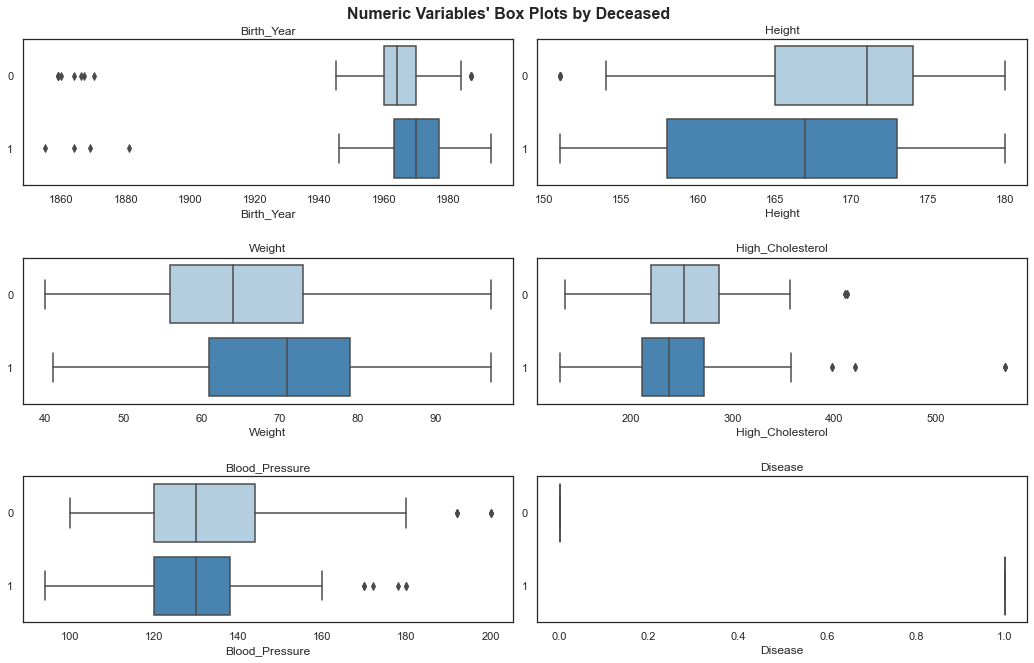

In [22]:
#excluding name since it is not an important feature

features=numeric_feat+['Disease']

fig, axes = plt.subplots(3, 2,figsize=(18, 10))

for ax, f in zip(axes.flatten(), features):
    sns.boxplot(x=f, data=train_df, ax=ax, y='Disease', palette='Blues', orient = "h")
    ax.set_title(f)
    ax.set_ylabel('') 

    
plt.suptitle("Numeric Variables' Box Plots by Deceased", fontsize=16,fontweight = 'bold')
plt.subplots_adjust(left = None, bottom = None, right = None, top = .935, wspace = 0.05, hspace = 0.5) 

plt.show()

***

<a class="anchor" id="NumericFeaturesHist">
    
### 2.2.3 Numeric Features - Histograms

</a>

***

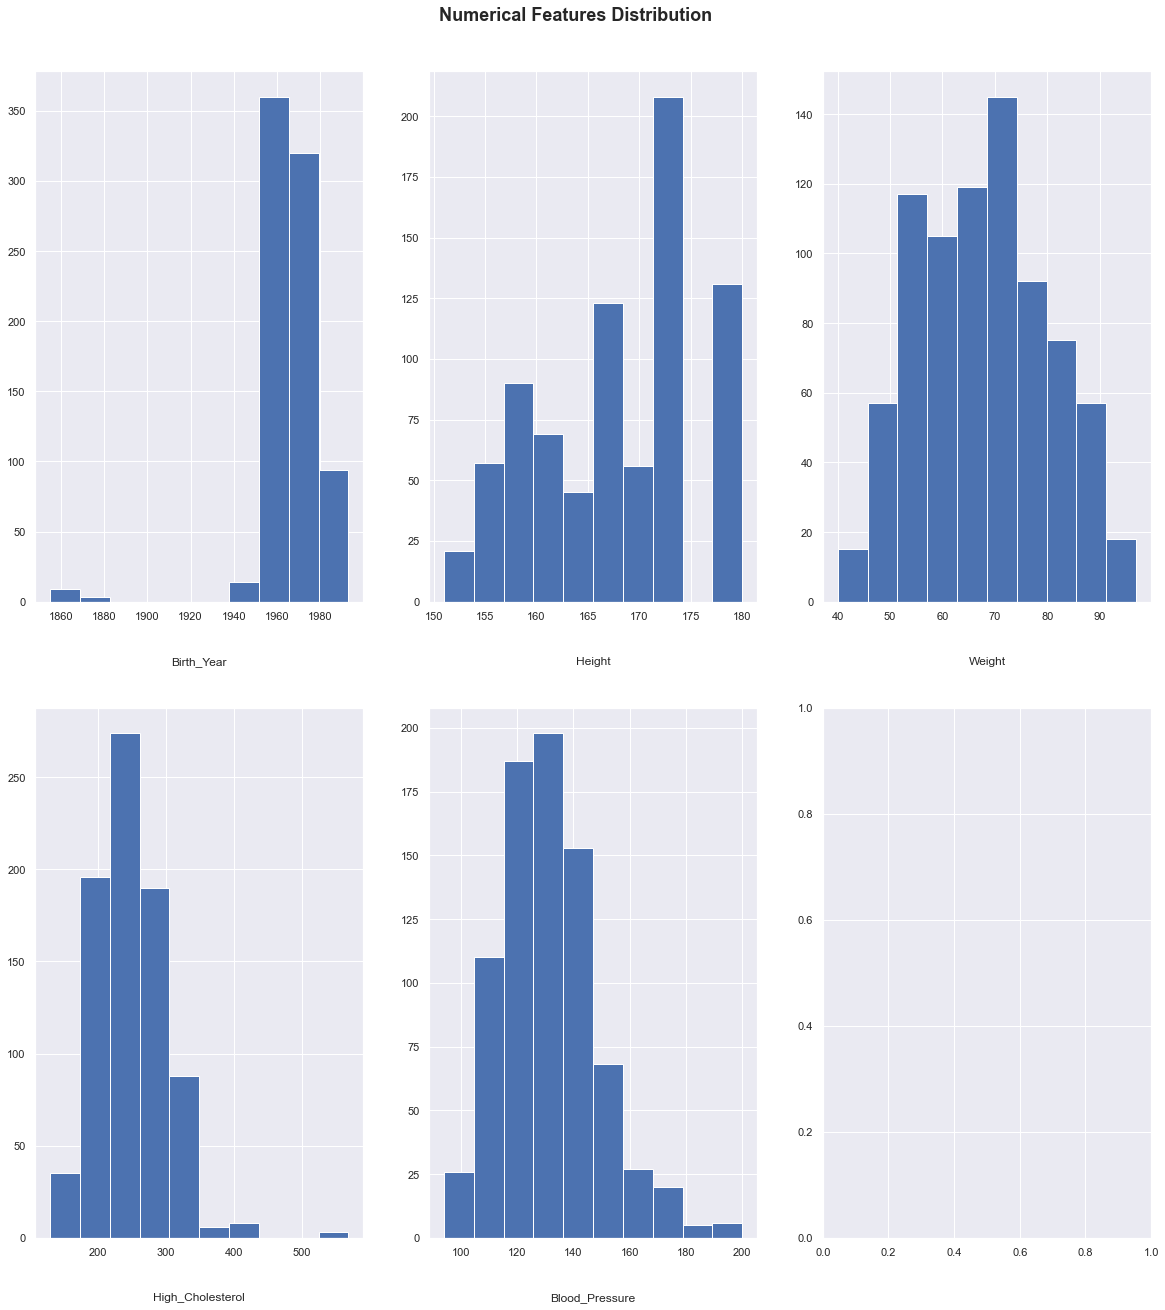

In [23]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(numeric_feat) / 2), figsize=(20, 20))

for ax, feat in zip(axes.flatten(), numeric_feat): 
    ax.hist(train_df[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables' Histograms"

# Layout
plt.suptitle('Numerical Features Distribution', fontsize = 18, fontweight = 'bold')
plt.subplots_adjust(left = None, bottom = None, right = None, top = .935, wspace = None, hspace = None) 

plt.show()

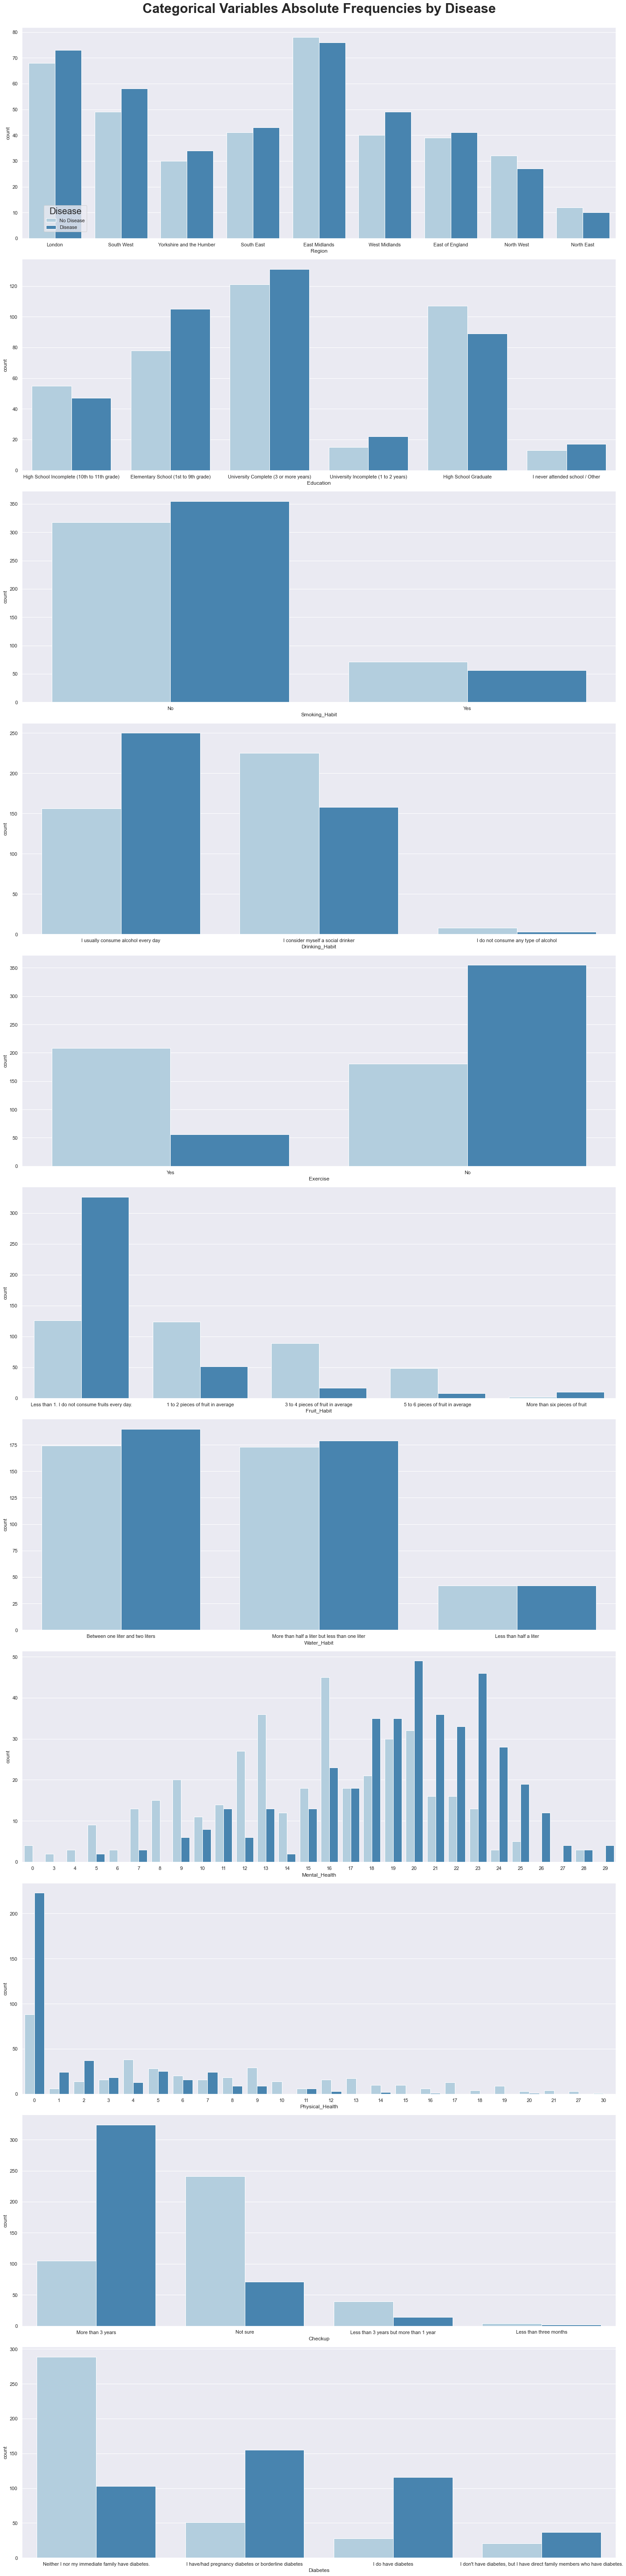

In [24]:
fig, axes = plt.subplots(11, math.floor(len(categorical_feat)/11), figsize=(20,80))

for ax, x in zip(axes.flatten(), categorical_feat):
    if x == "Disease":
        sns.countplot(x=x, hue="Disease", order=[0, 1], data=df,  ax=x)
    else:
        sns.countplot(x=x, hue="Disease", data=train_df, ax=ax , palette='Blues')
    ax.get_legend().remove()

handles, _ = axes[0].get_legend_handles_labels()
fig.legend(handles, ["No Disease", "Disease"], loc=(0.07,0.91), title="Disease", title_fontsize=20)

#plt.subplots_adjust(wspace=0.5)
plt.suptitle("Categorical Variables Absolute Frequencies by Disease", y=1, fontsize=30, fontweight = 'bold')
plt.subplots_adjust(left = None, bottom = None, right = None, top = .935, wspace = None, hspace = None) 

plt.tight_layout()

In [25]:
# Investigate all elements within each feacture

for column in train_df:
    unique_values = np.unique(train_df[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print('\n\033[1mThe number of values for feature\033[0m {} \033[1mare:\n\033[0m {} -- {} '.format(column, nr_values, unique_values))
    else:
        print('\n\033[1mThe number of values for feature\033[0m {} \033[1mare:\n\033[0m {}'.format(column, nr_values))


The number of values for feature PatientID are:
 800

The number of values for feature Name are:
 799

The number of values for feature Birth_Year are:
 50

The number of values for feature Region are:
 9 -- ['East Midlands' 'East of England' 'London' 'North East' 'North West'
 'South East' 'South West' 'West Midlands' 'Yorkshire and the Humber'] 

The number of values for feature Education are:
 6 -- ['Elementary School (1st to 9th grade)' 'High School Graduate'
 'High School Incomplete (10th to 11th grade)'
 'I never attended school / Other' 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)'] 

The number of values for feature Disease are:
 2 -- [0 1] 

The number of values for feature Smoking_Habit are:
 2 -- ['No' 'Yes'] 

The number of values for feature Drinking_Habit are:
 3 -- ['I consider myself a social drinker'
 'I do not consume any type of alcohol'
 'I usually consume alcohol every day'] 

The number of values for feature Exercise are:
 2 -- [

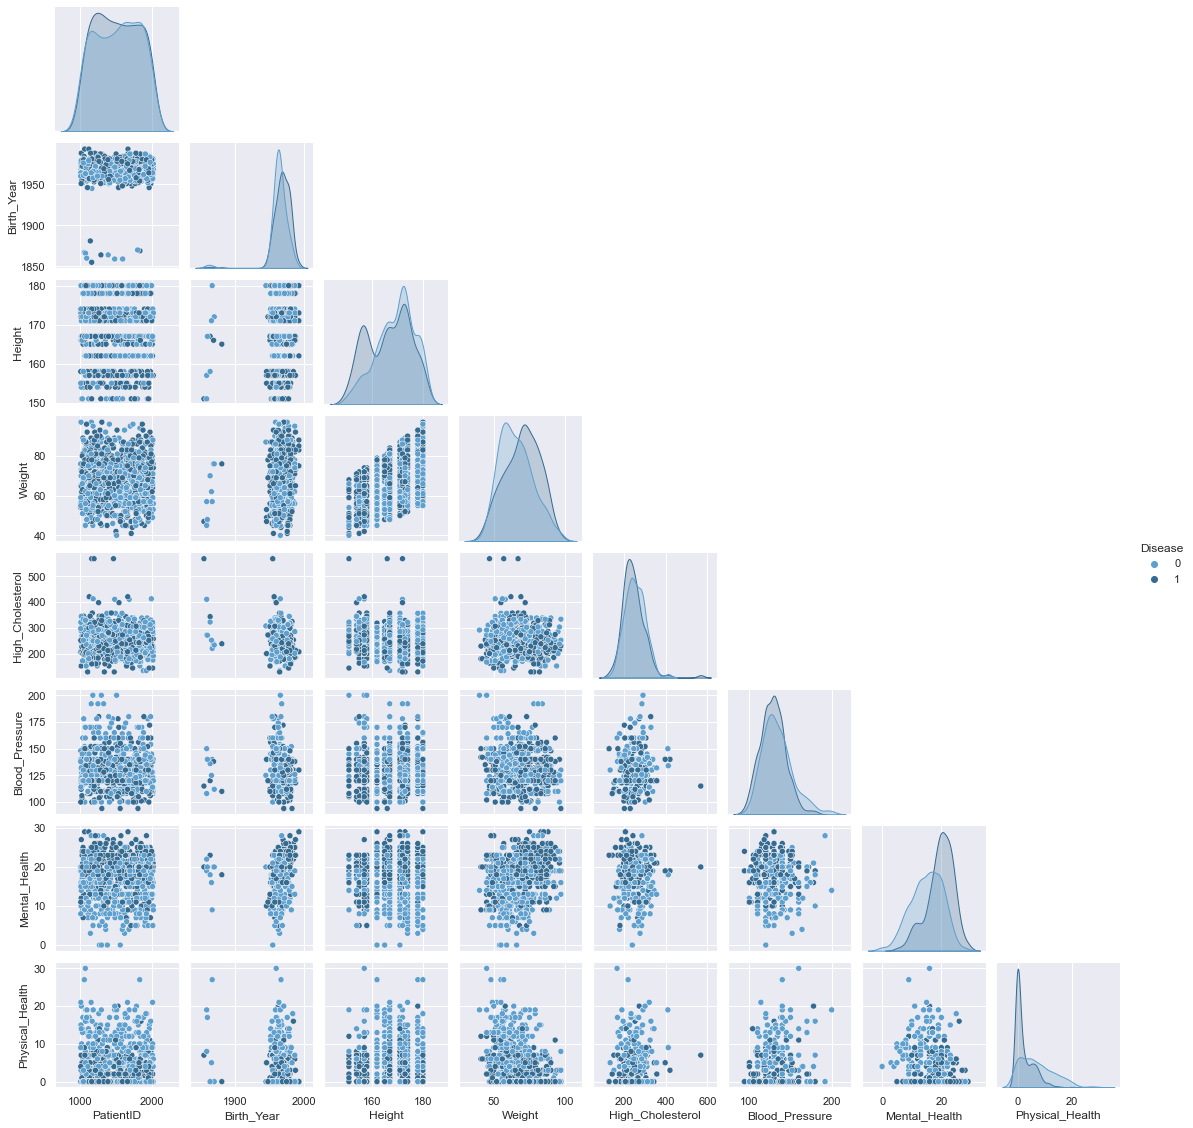

In [26]:
# Layout
plt.rcParams['font.size'] = '15'

# Visualize the data using pairplots
pairplots = sns.pairplot(train_df,height = 2, hue = 'Disease', palette='Blues_d', corner = True)

plt.show()


***

<a class="anchor" id="Redundancy">
    
### 2.2.4 Redundancy over Features

</a>


***
__Interpretation__

* __Strong correlations with the target variable__ <p>
* __Redundancy, through strong correlations between training variables__ <p>
    
The __Pearson correlation__ follows some assumptions like: <p>
>    1 - __Data variables are on an interval or ratio level of measurement__ <p>
>    2 - __Data variables follow normal distribution__ <p>
>    3 - __Data has no outliers__<p>
    
Since the data doesn't meet assumptions 2 and 3, it'll not be used<p> 
The __Spearman correlation__ follows an assumption: <p>
>    1 - __Data variables are monotonically related__ (meaning that the relationship between variables fall within the following 2 possibilities: 
    >> 1 - As the the value of one variable increases, so does the value of the other variable<p>
    >> 2 - As the value of one variable increases, the other variable value decreases<p>
   
Because the data meet this assumption, the __Spearman correlation__ test will be one used<p>
***


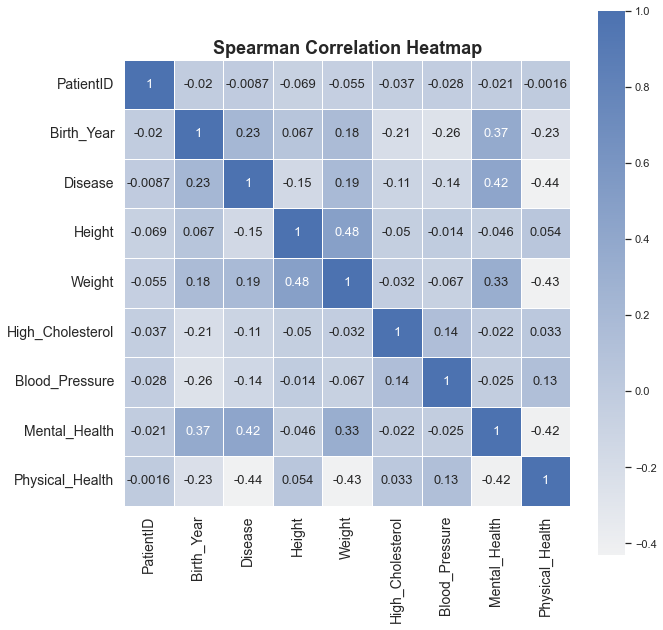

In [27]:
# By spearman correlation we can check correlation between each element

correlation_spearman = train_df.corr('spearman')
correlation_spearman

# Plot
plt.figure(figsize = (10, 10))

# plot a heatmap with annotation
sns.heatmap(correlation_spearman
            , annot=True
            , annot_kws={"size": 13}
            , cmap = sns.color_palette("light:b", as_cmap=True)
            , square = True
            , robust=True
            , linewidths = .7
           )


#customize
plt.title('Spearman Correlation Heatmap',fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.show()

***

<a class="anchor" id="OutlierRemove">
    
## 2.3 Removing Outliers

</a>

***


***

<a class="anchor" id="ZScore">
    
### 2.3.1 Z-Score Method

</a>

__Z-score is a statistical measure that reveals how far is a data point from the rest of the dataset__. In other words, Z-score shows how many standard deviations away a given observation is from the mean, denoted by __z__ and is calculated using the following formula: 
<p><p><p>$$\Large{{z}} = \frac{{(x-\overline{x})}}{s}$$
    
Z-score assumes the distribution of the data is normal, therefore only features with this characteristic will be analyzed with this test
    
There are some rules for the threshold used to consider a value an outlier, in this case, it'll the threshold will be 3.5 according to __the rule of thumb__ (which is to use 2, 2.5, 3 or 3.5 as threshold), meaning that __values that are 3.5 standard deviations far from the mean (extreme outliers), are considered outliers by this test__

***

<a class="anchor" id="IQR">
    
### 2.3.2 Interquartile Range Method (IQR)

</a>

***
__Interpretation__

A __boxplot__ is a standardized way of displaying graphetically the locality, spread and skewness groups of numerical data through their quartiles, based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.
<ul>
    <li>Minimum (Q0 or 0th percentile): the lowest data point in the data set excluding any outliers
    <li>Maximum*** (Q4 or 100th percentile): the highest data point in the data set excluding any outliers
    <li>Median (Q2 or 50th percentile): the middle value in the data set
    <li>First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), it is the median of the lower half of the dataset.
    <li>Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), it is the median of the upper half of the dataset.
</ul>

<img src='https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png' width="750" height="350">

Any data point lower than the Lower Bound or higher than the Upper Bound __is considered as an outlier by this method__

***

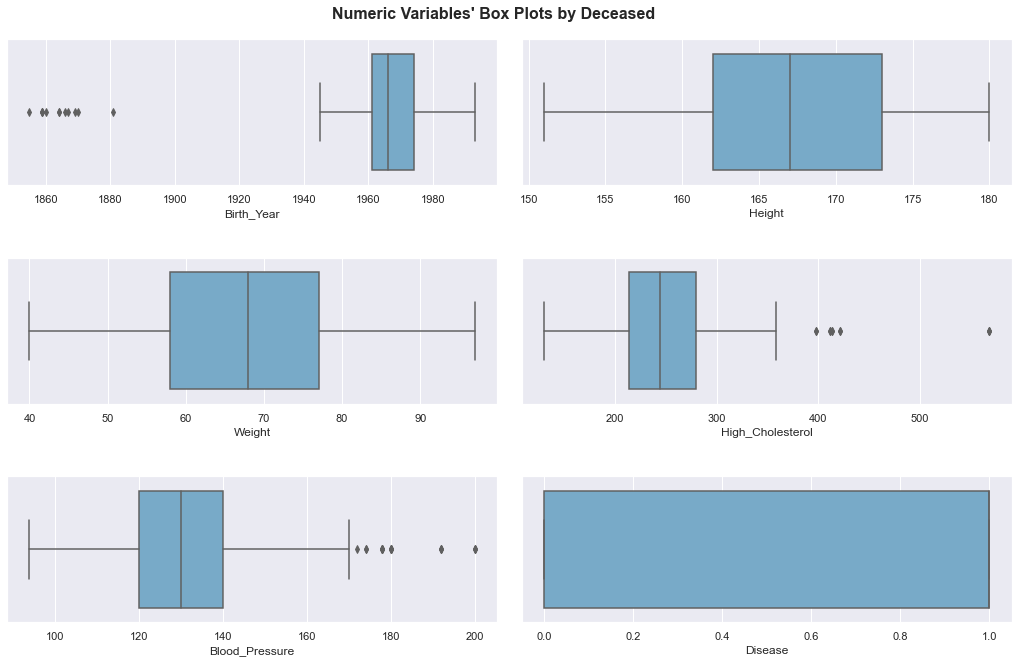

In [28]:
#excluding name since it is not an important feature

features=numeric_feat+['Disease']

fig, axes = plt.subplots(3, 2,figsize=(18, 10))

for ax, f in zip(axes.flatten(), features):
    sns.boxplot(x=f, data=train_df, ax=ax, palette='Blues', orient = "h")

    
plt.suptitle("Numeric Variables' Box Plots by Deceased", fontsize=16,fontweight = 'bold')
plt.subplots_adjust(left = None, bottom = None, right = None, top = .935, wspace = 0.05, hspace = 0.5) 

plt.show()

***

<a class="anchor" id="ManualMethod">
    
### 2.3.3 Manual Method

</a>


***
__Interpretation__

As we can directly watch in pairplot related to __Birth_Year__ column that there a few values very away of the majority, those are outliers, small number of elements and large distance of the majority.

Those can be excluded by droping Birth_Year values above 1900 as done below: 
***

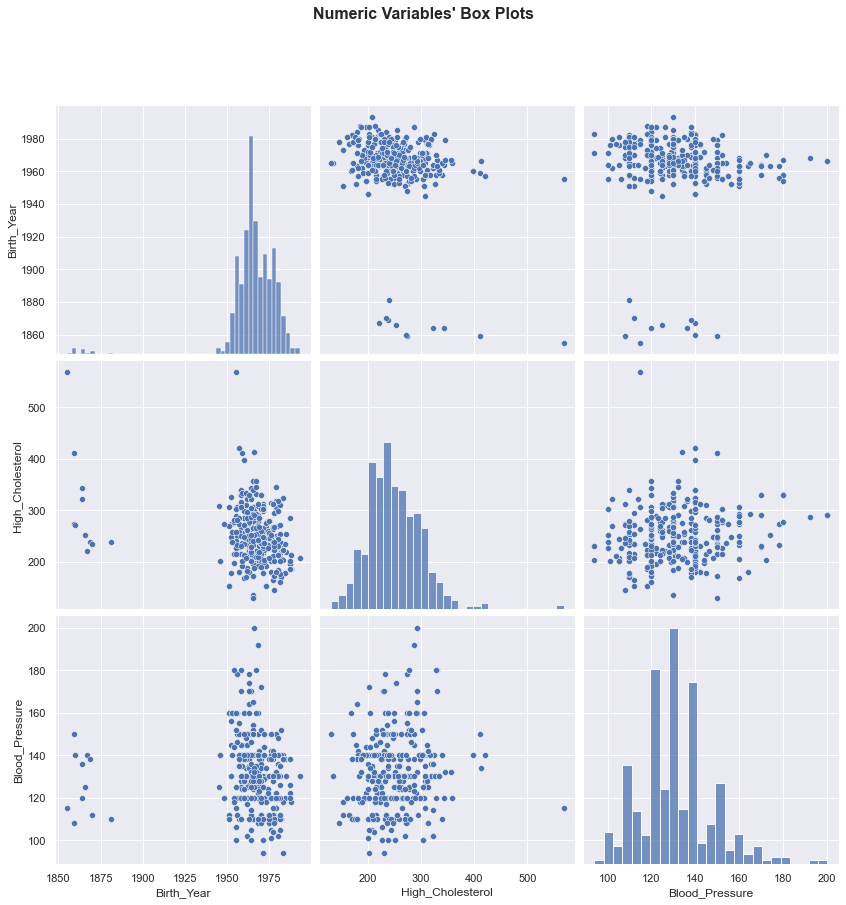

In [29]:
metric_feat=['Birth_Year', 'High_Cholesterol', 'Blood_Pressure',]
features=metric_feat

pairplots = sns.pairplot(train_df[metric_feat], hue = None, palette='Blues_r', height = 4)

plt.suptitle("Numeric Variables' Box Plots", fontsize=16, x=0.5, y=1.05, fontweight = 'bold')
plt.subplots_adjust(left = None, bottom = None, right = None, top = .935, wspace = None, hspace = None) 

plt.show()

In [30]:
# Deleting the outliers
train_df[train_df['Birth_Year'] < 1900]

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
18,1591,Mrs. Ashley Pena,1859,Yorkshire and the Humber,Elementary School (1st to 9th grade),0,No,I usually consume alcohol every day,Yes,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,157,47,273,108,22,8,More than 3 years,Neither I nor my immediate family have diabetes.
61,1481,Mrs. Lisa Cooks,1859,East Midlands,High School Graduate,0,No,I consider myself a social drinker,No,5 to 6 pieces of fruit in average,More than half a liter but less than one liter,157,57,411,150,19,19,Not sure,Neither I nor my immediate family have diabetes.
93,1288,Mrs. Minnie Hirschfeld,1864,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,167,70,344,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
198,1139,Mr. Gary Baca,1881,East Midlands,University Incomplete (1 to 2 years),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,165,76,239,110,18,0,More than 3 years,I do have diabetes
312,1158,Mrs. Mary Hollingsworth,1855,South West,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,151,47,568,115,20,7,Not sure,I have/had pregnancy diabetes or borderline di...
493,1593,Mrs. Nicole Ronin,1859,North East,Elementary School (1st to 9th grade),0,No,I usually consume alcohol every day,Yes,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,151,45,273,108,22,8,More than 3 years,Neither I nor my immediate family have diabetes.
566,1055,Mr. Douglas Salters,1867,East Midlands,Elementary School (1st to 9th grade),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Less than half a liter,180,57,221,140,9,27,Not sure,Neither I nor my immediate family have diabetes.
593,1836,Mrs. Sharyn Furst,1869,West Midlands,High School Graduate,1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,166,76,238,138,20,0,More than 3 years,Neither I nor my immediate family have diabetes.
640,1803,Mr. Kenneth Ferraro,1870,East of England,High School Graduate,0,No,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,Between one liter and two liters,172,76,234,112,20,0,More than 3 years,Neither I nor my immediate family have diabetes.
648,1072,Mr. Steven Fisher,1866,East Midlands,University Complete (3 or more years),0,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,171,62,253,125,16,5,More than 3 years,Neither I nor my immediate family have diabetes.


In [31]:
dataremovedBirthYear = (len(train_df[train_df['Birth_Year'] < 1900])/len(train_df))*100
dataremainBirthYear = (100 - (len(train_df[train_df['Birth_Year'] < 1900])/len(train_df)*100))

print('Patients with Birth Year before 1900 are \033[1m{}%\033[0m of the Dataset, after removing these we will remain with \033[1m{}%\033[0m of the Dataset'.format(dataremovedBirthYear,dataremainBirthYear))

Patients with Birth Year before 1900 are 1.5% of the Dataset, after removing these we will remain with 98.5% of the Dataset


In [32]:
# Check Test Data
test_df[test_df['Birth_Year'] < 1900]

,PatientID,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes


***
__After running pairplot over data again we can check that:__

1 - Outliers of __Birth_Year__ are excluded

2 - By the same check interpretation there are some outliers related to columns __High_Cholesterol__, we can exclude all above 500



***

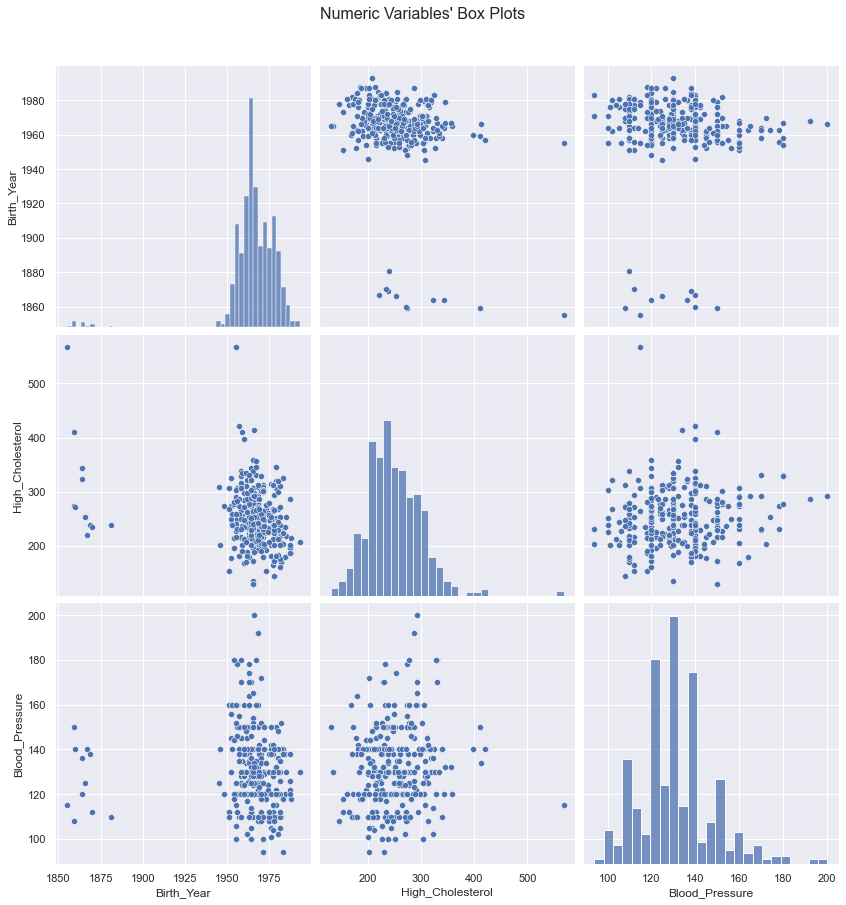

In [33]:
metric_feat=['Birth_Year', 'High_Cholesterol', 'Blood_Pressure',]
features=metric_feat

pairplots = sns.pairplot(train_df[metric_feat], hue = None, palette='Blues_r', height = 4)

plt.suptitle("Numeric Variables' Box Plots", fontsize=16, x=0.5, y=1.05)
plt.show()

In [34]:
# We also can regard patients with cholesterol of more then 500 as outliers

train_df[train_df['High_Cholesterol'] > 500]

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
22,1464,Mrs. Jeanne Rogers,1955,East Midlands,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,166,57,568,115,20,7,Not sure,I have/had pregnancy diabetes or borderline di...
312,1158,Mrs. Mary Hollingsworth,1855,South West,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,151,47,568,115,20,7,Not sure,I have/had pregnancy diabetes or borderline di...
729,1192,Mrs. Karen Smallidge,1955,London,I never attended school / Other,1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,67,568,115,20,7,Not sure,I have/had pregnancy diabetes or borderline di...


In [35]:
len(train_df[train_df['High_Cholesterol'] > 500])/(len(train_df))*100

0.375

In [36]:
dataremovedHighChol = round(len(train_df[train_df['High_Cholesterol'] > 500])/(len(train_df))*100,3)
dataremainHighChol = round((100 - (len(train_df[train_df['High_Cholesterol'] > 500])/(len(train_df))*100)),3)

print('Patients with Cholesterol Level above 500 are \033[1m{}%\033[0m of the Dataset,after removing these we will remain with \033[1m{}%\033[0m of the Dataset'\
      .format(dataremovedHighChol,dataremainHighChol))


Patients with Cholesterol Level above 500 are 0.375% of the Dataset,after removing these we will remain with 99.625% of the Dataset


In [37]:
test_df[test_df['High_Cholesterol'] > 500]

,PatientID,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes


***
__Lets run pairplot again to check updated data:__

1 - Outliers of __Birth_Year__ are excluded;

2 - Outliers of __High_Cholesterol__ are excluded;

2 - Once more by the same approach we also note some outliers related to columns __Blood_Pressure__, so we should exclude all above 180, ALTHOUGH we have to make sure that our model is created with the same parameters as test data, and if we check the same filter in test data we see that in Blood Pressure test exist one Patient that have more then 180, so we can not exclude this as ouitlier
***


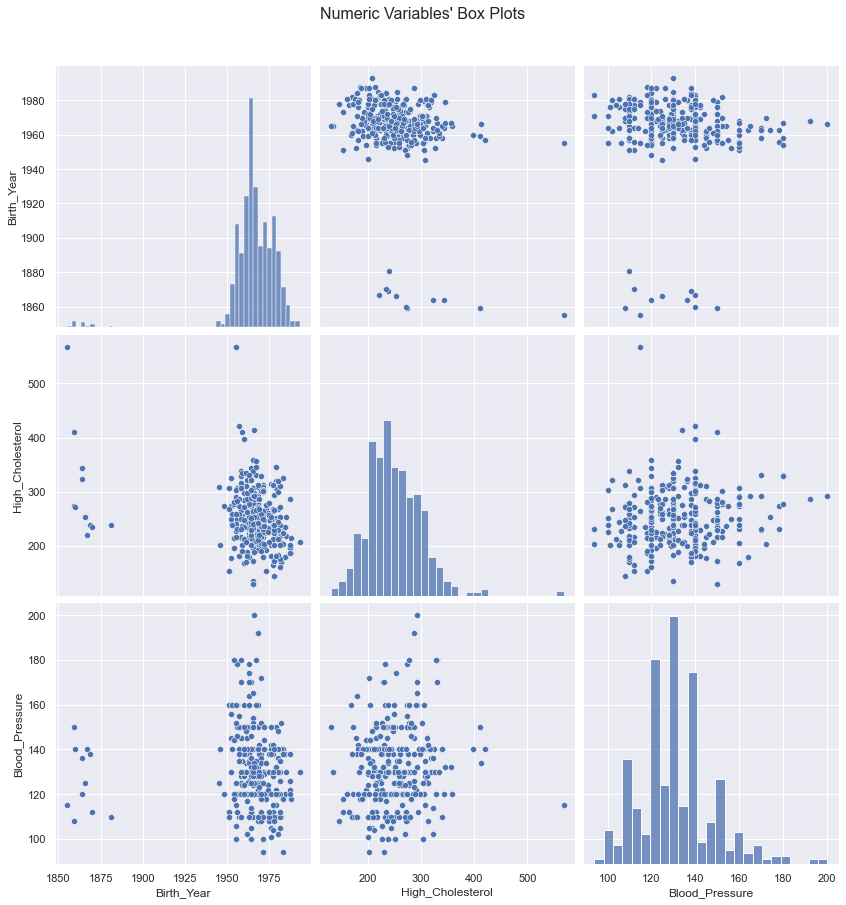

In [38]:
metric_feat=['Birth_Year', 'High_Cholesterol', 'Blood_Pressure',]
features=metric_feat

pairplots = sns.pairplot(train_df[metric_feat], hue = None, palette='Blues_r', height = 4)

plt.suptitle("Numeric Variables' Box Plots", fontsize=16, x=0.5, y=1.05)
plt.show()

In [39]:
test_df[test_df['Blood_Pressure'] > 180]

,PatientID,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
45,1688,Mrs. Rhonda Byrd,1966,East of England,High School Incomplete (10th to 11th grade),Yes,I consider myself a social drinker,Yes,3 to 4 pieces of fruit in average,Between one liter and two liters,157,42,292,200,14,19,Not sure,Neither I nor my immediate family have diabetes.


***

__We have to check Test Data with Outliers filters of Train Data outliers__

1 - __Birth_Year__ > 1900

2 - __High_Cholesterol__ > 500

3 - __Blood_Pressure__ > 180

If Test set presents a Patient in the range of this filters we have to keep it in Train otherwise our model will not be able to detect these patients accuratly

***

***

<a class="anchor" id="OutConclusion">
    
### 2.3.4 Outliers Conclusion

</a>

***
__Interpretation__

We can see that Manual Method is more conservative once IQR would exclude Patients with Blood Pressure above 180 and those are extremely necessary for our model once Testset regard on Patient with Blood Pressure levels of 200.

We also have to check if data keep balances, number of deseased has to be balanced with non deseases patients

***

In [40]:
# Droping elements that have been born after 1900 once we can check that are outliers
train_df = train_df[train_df['Birth_Year'] > 1900]

# Drop 500+ cholesterol patients
train_df = train_df[train_df['High_Cholesterol'] < 500]


We can check that variable y (Disease) is balanced


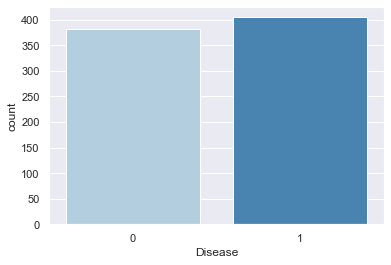

In [41]:
# Investigate the dist of y

sns.countplot(x = 'Disease', data = train_df, palette = 'Blues')
print('\033[1mWe can check that variable y (Disease) is balanced\033[0m')


***

<a class="anchor" id="Enconding">
    
## 2.4 Categorical Features Enconding

</a>

***
__Interpretation__

Our last goal of data preprocessing is change all categorical feactures to numerical feactures, the more accurate way is using Pandas funcionality named 'get_dummies'

__get_dummies__: Convert convert categorical variables into dummy/indicator variables. Each category per column will pass to be a columns and that columns valeus will regard only 1 and 0, 1 if that categary is associated to ID row and 0 if not 

After this we have our data completly converted to numerical data and ready to be worked on modeling! 
***


***

<a class="anchor" id="BoolToBinary">
    
### 2.4.1 Boolean Features to Binary

</a>

***
__Interpretation__

Is notable that some features can easly be changed to numerical features, like [Execise] and [Smoking_Habit] these ones are filled with Boolean values [Yes / No] which will be change to [1 / 0] respectively.

Also PatientName can be drop, this column is ambiguous with PatientID.
***

In [42]:
# Change Yes and No to 1 and 0s

train_df['Exercise'] = train_df['Exercise'].map({'Yes': 1, 'No': 0})
train_df['Smoking_Habit'] = train_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})
train_df

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,0,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,0,I consider myself a social drinker,0,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,0,I consider myself a social drinker,0,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,1912,Mr. Mike Jefferson,1987,Yorkshire and the Humber,High School Graduate,0,0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,74,202,120,13,7,Not sure,Neither I nor my immediate family have diabetes.
795,1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,0,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
796,1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,0,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
798,1662,Mr. Florencio Doherty,1975,East of England,Elementary School (1st to 9th grade),1,0,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,165,75,208,112,16,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [43]:
# Change Yes and No to 1 and 0s

test_df['Exercise'] = test_df['Exercise'].map({'Yes': 1, 'No': 0})
test_df['Smoking_Habit'] = test_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})
test_df

,PatientID,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),1,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1,1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),0,I consider myself a social drinker,0,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes
2,1828,Mr. Robert Foreman,1978,West Midlands,High School Incomplete (10th to 11th grade),0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,171,78,237,130,24,1,More than 3 years,I have/had pregnancy diabetes or borderline di...
3,1155,Mr. Edwin Ferguson,1968,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),0,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Less than half a liter,174,87,313,108,19,0,Not sure,I do have diabetes
4,1020,Mr. Eliseo Krefft,1962,East Midlands,High School Incomplete (10th to 11th grade),0,I consider myself a social drinker,0,Less than 1. I do not consume fruits every day.,Less than half a liter,172,56,189,140,19,14,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1000,Mr. John Eichhorn,1970,East Midlands,University Incomplete (1 to 2 years),0,I usually consume alcohol every day,0,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,178,89,216,125,22,4,Not sure,Neither I nor my immediate family have diabetes.
221,1256,Mrs. Tiffany Medley,1987,West Midlands,University Complete (3 or more years),0,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Less than half a liter,154,63,187,138,25,6,More than 3 years,Neither I nor my immediate family have diabetes.
222,1318,Mr. Kenneth Crase,1963,East Midlands,High School Graduate,0,I usually consume alcohol every day,1,1 to 2 pieces of fruit in average,Between one liter and two liters,173,90,181,140,20,0,Not sure,Neither I nor my immediate family have diabetes.
223,1953,Mrs. Tracy Williams,1977,East Midlands,High School Incomplete (10th to 11th grade),0,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,155,45,240,138,18,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [44]:
# Separate names with Patient ID for a separated DataFrame 

PatientNameID = train_df[['PatientID','Name']]
PatientNameID

# Drop Name, once those are already saved in other df, in order to have only numerica features 
train_df.drop('Name', axis= 1, inplace = True)


In [45]:
# Separate names with Patient ID for a separated DataFrame 

PatientNameID_test = test_df[['PatientID','Name']]
PatientNameID_test

# Drop Name, once those are already saved in other df, in order to have only numerica features 
test_df.drop('Name', axis= 1, inplace = True)


***
The creation of table 'PatientNameID' is irrelevante, is addicional, we never gona use this data in the future, although during professional work if we need to check which Patient Name is related to one PatientID we can easily check from this separated table

We also drop columns 'Name' because is a non numerical feacture, and once one is related to an ID we can drop it because columns 'PatientID' have the same utility
***

***

<a class="anchor" id="DummyEnco">
    
### 2.4.2 Dummy Encoding

</a>

***
__Interpretation__


__Dummy Encoding__, this categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding.
***

In [46]:
# Change categorical variables into numeric representation

categorical_features = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
train_df = pd.get_dummies(train_df, columns = categorical_features)
train_df

,PatientID,Birth_Year,Disease,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,...,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Checkup_Less than 3 years but more than 1 year,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
0,1167,1965,1,0,1,155,67,358,120,21,...,0,0,0,0,1,0,0,0,0,1
1,1805,1969,1,0,1,173,88,230,142,9,...,0,0,0,0,0,1,0,0,0,1
2,1557,1974,1,0,0,162,68,226,122,26,...,0,1,0,0,1,0,0,0,0,1
3,1658,1958,0,0,1,180,66,313,125,13,...,0,1,0,0,0,1,0,0,1,0
4,1544,1968,1,0,0,180,58,277,125,18,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,1912,1987,0,0,1,173,74,202,120,13,...,0,0,0,0,0,1,0,0,0,1
795,1909,1972,0,0,1,178,61,204,144,12,...,0,0,0,0,0,1,0,0,0,1
796,1386,1980,1,0,0,157,61,213,120,23,...,0,0,0,0,1,0,0,0,1,0
798,1662,1975,1,0,0,165,75,208,112,16,...,0,1,0,0,1,0,0,0,0,1


In [47]:
# Change categorical variables into numeric representation

categorical_features_test = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
test_df = pd.get_dummies(test_df, columns = categorical_features_test)
test_df

,PatientID,Birth_Year,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,...,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Checkup_Less than 3 years but more than 1 year,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
0,1343,1970,1,0,172,80,203,172,20,2,...,0,0,0,0,0,1,0,0,1,0
1,1727,1966,0,0,171,80,225,130,21,0,...,0,1,0,0,0,1,1,0,0,0
2,1828,1978,0,1,171,78,237,130,24,1,...,0,0,0,0,1,0,0,0,1,0
3,1155,1968,0,0,174,87,313,108,19,0,...,1,0,0,0,0,1,1,0,0,0
4,1020,1962,0,0,172,56,189,140,19,14,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1000,1970,0,0,178,89,216,125,22,4,...,0,1,0,0,0,1,0,0,0,1
221,1256,1987,0,0,154,63,187,138,25,6,...,1,0,0,0,1,0,0,0,0,1
222,1318,1963,0,1,173,90,181,140,20,0,...,0,0,0,0,0,1,0,0,0,1
223,1953,1977,0,1,155,45,240,138,18,0,...,0,1,0,0,1,0,0,0,0,1


In [48]:
train_df.set_index('PatientID',inplace=True)
test_df.set_index('PatientID',inplace=True)

***

<a class="anchor" id="FeaureSelection">
    
# 3. Feature Selection

</a>

***

<ul>
    <li>Split the data into X and y</li>
    <li>Run a Tree-based estimators</li>
    <li>Run Feature Importance</li>
    <li>Split the data into new variables only regarding the importante variables</li>
</ul>

***

In [49]:
# Split the data into x and y

X = train_df.drop(['Disease'], axis = 1) 
y = train_df['Disease']

***
Is necessary to split our data into to datas:

__X__ - X will always regard full train data __excluding__ the result column which is the Disease column in this case

__y__ - y will always regard only the result columns, which is Disease column in this case
***

***

<a class="anchor" id="FeatureImportance">
    
## 3.1 Feature Importance

</a>

***
__Interpretation__

__Feature Importance__ - Is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by number of samples that reach the node, divided by the total number of samples, the higher the value the more important thi feature. 

In [50]:
DecisionTree = DecisionTreeClassifier(random_state=0,
                                      criterion= 'entropy',
                                      max_depth=10)
DecisionTree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

***
__Interpretation__

__For undertanding of this process we need to understand several key words such as:__

__Entropy__ - Entropy in statistical mechanics is as measure of the number of ways a system can be arranged, often taken to be a measure of 'disorder' ( the higher the entropy, the higher the disorder).

__Decision Tree Classifier or Classification__ - We will analyse with more detail this model below once we run the 'Decision Tree Model', although now we just have to undertande that Decision Tree Classifier builds classification in the form of a tree structure, it breaks down a data set into smaller and smaller subsets, each subset is created by a decision classification. It will results in decision nodes and leaf nodes.


<img src='https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png' width="541" height="301">


Decision Tree classifier have a functionality named __'Feature Importance'__  


***

__Code Interpretation__

We define the __DecisionTreeClassifier__ parameter as :

__radom_state = 0__ - random_state represents the 'sample' of data that classifier will take to work over it, random_state = 0 is always the same, as 1, as 2, as 3, are groups of data that will be measured and classified by the classifier. We used the 0 one.

__criterion = 'entropy'__ - criterion is the function to measure the quality of a split. Supported criteria are
    _"gini"_ for the Gini impurity and _"entropy"_ for the information gain. We use _entropy_. 
    
> '__gini__' - 'Gini impurity' or 'mean decrease impurity' is defined as the total decrease in node impurity averaged over all trees of the ensemble

> '__entropy__' - 'Entropy' is one of the most important concepts in information theory, is a measure of the amount of disorder

__max_depth = 10__ - The maximum depth of the tree, is the maximum of a binary tree, is the number of nodes along the longest path from the root node down to the farthest leaf node


After we decide our paramenters we fit our model to our data, which is __X__ (data to analyse) and __y__ (data result)

***


In [51]:
# Feature Importance

fi_col = []
fi = []

for i,column in enumerate(train_df.drop(['Disease'], axis = 1)):
    fi_col.append(column)
    fi.append(DecisionTree.feature_importances_[i])

fi_DecisionTree = pd.DataFrame(zip(fi_col, fi), columns = ['Feature','Feature Importance'])
fi_DecisionTree = fi_DecisionTree.sort_values('Feature Importance', ascending = False).reset_index().drop('index',axis=1)
fi_DecisionTree

# Creating list of columns to keep, only include feactures that contribute to model prediction
# Only regarding Importance above 0.02

DecisionTree_columns_to_keep = fi_DecisionTree.loc[(fi_DecisionTree['Feature Importance'] > 0.02)]

DT_columns_to_keep = DecisionTree_columns_to_keep['Feature'].values

X = X[DT_columns_to_keep]

X

,Checkup_More than 3 years,Birth_Year,Physical_Health,Diabetes_Neither I nor my immediate family have diabetes.,Fruit_Habit_Less than 1. I do not consume fruits every day.,High_Cholesterol,Mental_Health,Blood_Pressure,Fruit_Habit_1 to 2 pieces of fruit in average,Weight,Drinking_Habit_I usually consume alcohol every day
PatientID,,,,,,,,,,,
1167,1,1965,2,1,1,358,21,120,0,67,1
1805,0,1969,0,1,1,230,9,142,0,88,0
1557,1,1974,0,1,1,226,26,122,0,68,0
1658,0,1958,8,0,1,313,13,125,0,66,1
1544,1,1968,2,0,0,277,18,125,1,58,0
...,...,...,...,...,...,...,...,...,...,...,...
1912,0,1987,7,1,1,202,13,120,0,74,1
1909,0,1972,4,1,1,204,12,144,0,61,0
1386,1,1980,0,0,1,213,23,120,0,61,1


In [52]:
X[X.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Checkup_More than 3 years,786.0,0.534351,0.499136,0.0,0.0,1.0,1.0,1.0
Birth_Year,786.0,1967.623410,8.983674,1945.0,1961.0,1966.0,1974.0,1993.0
Physical_Health,786.0,4.506361,5.378711,0.0,0.0,3.0,7.0,30.0
Diabetes_Neither I nor my immediate family have diabetes.,786.0,0.488550,0.500187,0.0,0.0,0.0,1.0,1.0
Fruit_Habit_Less than 1. I do not consume fruits every day.,786.0,0.566158,0.495919,0.0,0.0,1.0,1.0,1.0
High_Cholesterol,786.0,247.675573,47.543266,130.0,213.0,243.5,279.0,421.0
Mental_Health,786.0,17.314249,5.410226,0.0,13.0,18.0,21.0,29.0
Blood_Pressure,786.0,131.184478,17.077502,94.0,120.0,130.0,140.0,200.0
Fruit_Habit_1 to 2 pieces of fruit in average,786.0,0.220102,0.414579,0.0,0.0,0.0,0.0,1.0
Weight,786.0,67.947837,12.095841,40.0,59.0,68.0,77.0,97.0


In [53]:
test_df = test_df[DT_columns_to_keep]
test_df.reset_index()
test_df

,Checkup_More than 3 years,Birth_Year,Physical_Health,Diabetes_Neither I nor my immediate family have diabetes.,Fruit_Habit_Less than 1. I do not consume fruits every day.,High_Cholesterol,Mental_Health,Blood_Pressure,Fruit_Habit_1 to 2 pieces of fruit in average,Weight,Drinking_Habit_I usually consume alcohol every day
PatientID,,,,,,,,,,,
1343,0,1970,2,0,1,203,20,172,0,80,1
1727,0,1966,0,0,1,225,21,130,0,80,0
1828,1,1978,1,0,1,237,24,130,0,78,1
1155,0,1968,0,0,1,313,19,108,0,87,1
1020,1,1962,14,0,1,189,19,140,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...
1000,0,1970,4,1,0,216,22,125,0,89,1
1256,1,1987,6,1,1,187,25,138,0,63,1
1318,0,1963,0,1,0,181,20,140,1,90,1


***
__Interpretation__


After fit our data we run the function above to get the more important features(Columns), and we decide that, as normal approach, our feature importance have to be more then 0,02 which is 2%, yes is low but is significante!

Lets check then by spearman correlation if our features are correlated. Which are, there are no 0s.

__Spearman's Correlation__ - Spearman's Correlation is ranged from -1 to +1, the sign of the coefficient indicates whether it is a positive or negative ralationship. Positive correlation means that as one variable increased the other variable also tends to increase.

***

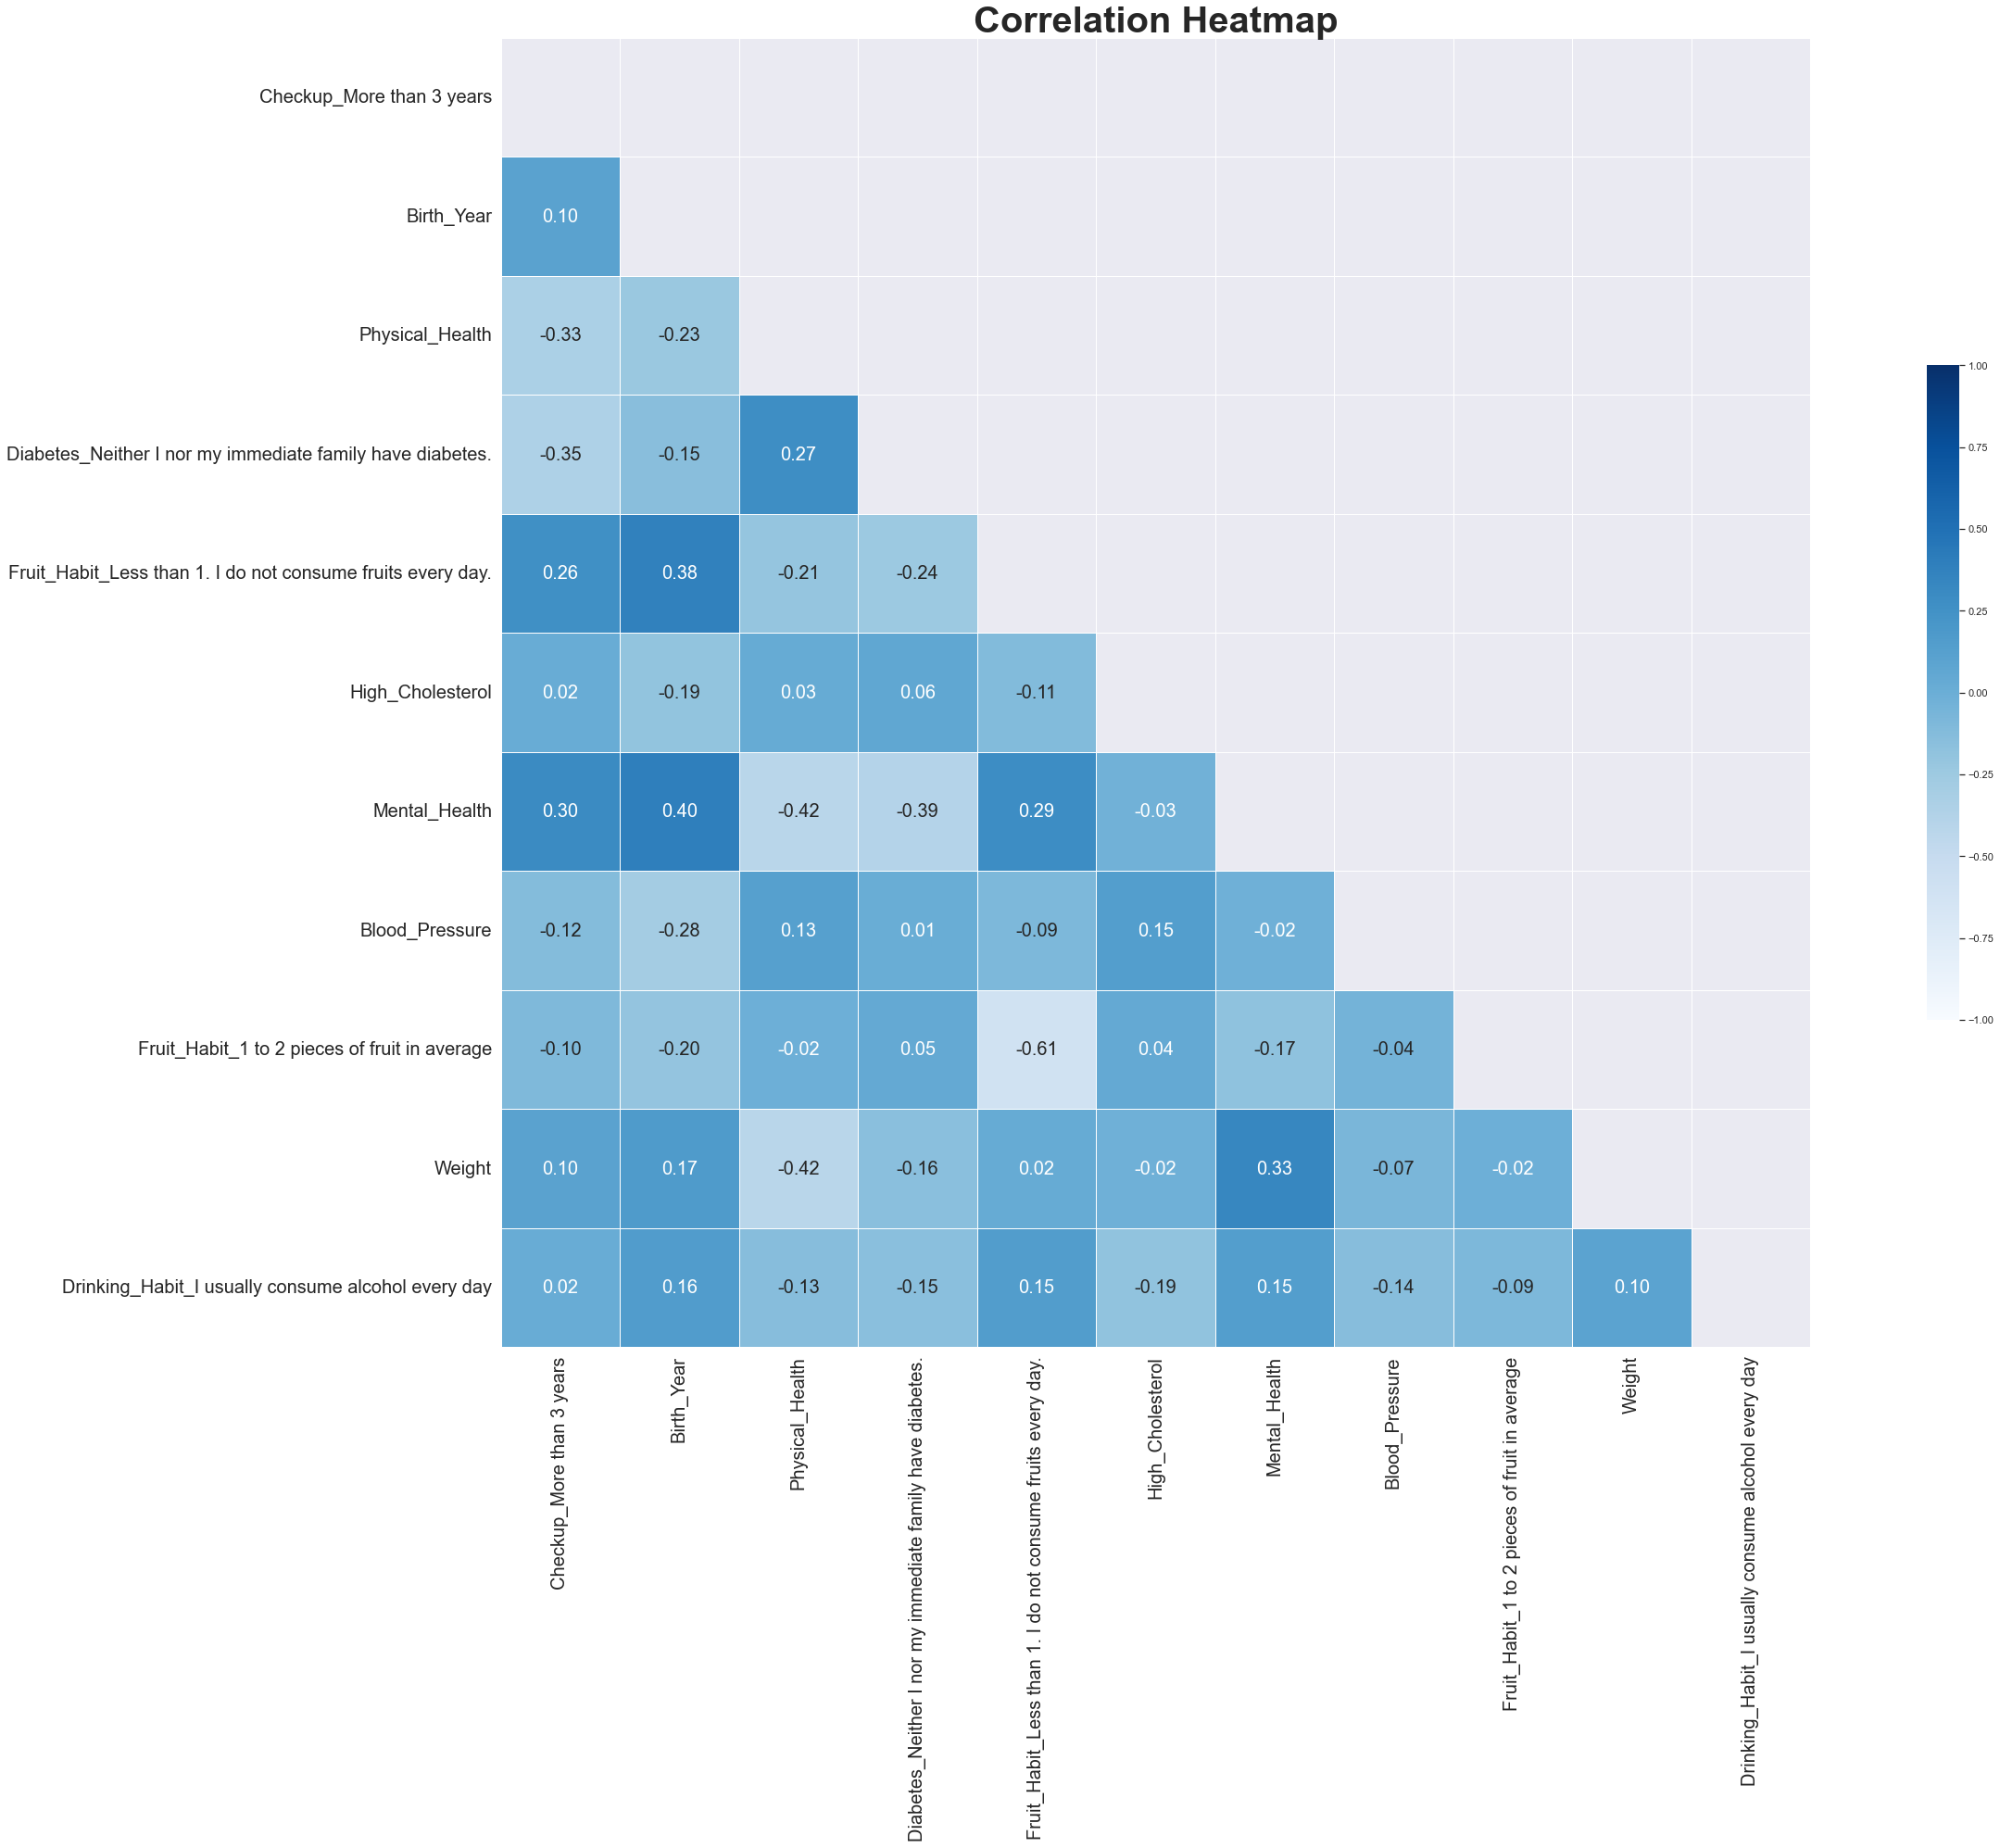

In [54]:
# Correlations analysis
# Plot
cmap = sns.color_palette('Blues', as_cmap=True)

# Computing the correlation matrix
corr = X.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (45, 26))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = 1, cbar_kws = {'shrink': 0.5}, annot = True, fmt = '.2f', annot_kws={"size":20})

#customize
plt.title('Correlation Heatmap',fontsize = 40, fontweight = 'bold')

plt.show()

In [55]:
# First split
X_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )

print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# IMPORTANTE : the larger the 'test_size' the highest the accurancy  

(158, 11)
(628,)
(158,)


***
__Interpretation__

Now to beggin training our models we always need to split the data by the __train_test_split__

__train_test_split__ - is a model validation procedure that reveals how our model performs on new data. Is used to split our data into train and test sets, after we divide our data into features (X) and labels (y) the dataframe gets divided into X_train, X_test, y_train and y_test, and X_train and y_train sets are used for training and fitting the models.

__train_test_split__ parameters are:

> First by order __X, y__, we define our features and labels to split;

> __train_size = 0.8, test_size = 0,2__ - Teorically the most commonly used ratio is 80:20, which means 80% of data is for training and 20% for testing the model. 

> __random_state = 2__ - as already explained this is a sample of all the data
>>Yes now we are using sample 2 and note 0 as in the classification, note that in classification for features importance is irrelevante the sample that you use beacuse the importance is calculated over all data and columns and entrupy over everything. Now things are diferent, after we define the models in nexts proceeds sometimes we dont get accurante samples to get good scores on models, which is normal, and we have to change the split sample as we did in this case, changed from 0 to 2.

>> As our random state change our accuracy also change. In order to prevent this accuracy change we have a concept called __Cross Validation__

***
***
__Cross Validation__

> __Types of Cross Validation:__


__1 - Leave One Out CV (LOOCV)__

_*Suposing we have a data set with 1000 rows (records)_

_*Also note that this cross validation is not used nowadays_

* By each interation experiment (a split) is made a split of 1 record as test data and the remaining 999 records are train data. Each experiment make the same split but with diferent 1 record. Resuming are 1000 experiments.

* This will lead to low bias ( equal to better result )

* __Disavantages__ are the time spend and resource of machine, not performing

To avoid this we have the next cross validation type:

__2 - K Fold CV__

_*Suposing we have a data set with 1000 rows (records)_

We select a k value as 5 (k=5), which means 5 experiments, per each experiments 200 records will be test data and the remaing 800 will be train data. 

* __1º experiment__ we have 200 record as test data and 800 and train data. We get one value of accuracy (accuracy 1).
* __2º experiment__ we have more 200 records, which leads to 400 records as test data and 600 as train data. Now we get other values of accuracy (accuracy 2).
* __3º experiment__ we have 600 record as test data and 400 as train data. Getting accuracy 3) 
* __4º experiment__ we have 800 record as test data and 200 as train data. Getting accuracy 4) 
* __5º experiment__ we have 200 record as test data and 800 as train data but not the same 200 as first but the last 200 that dont were used in record data yet. Getting accuracy 5) 

This will appen as many as the __k__ defined. After this cross check we can get the __mean of the accurancies__ which is the "___Respective accuracy of the model with respect of K Fold validation___", we also can get the __Max accuracy__ and __Min accuracy__ which will be the respective __Max and Min accuracies in the experiments universe__.

* __Disavantages__
_*Assuming this is a binary classification problem_

* Taking the 1º experiment, in the 200 test records we have all the 1 results, or in the 800 train records we have the maximum 1 possible of the dataset, it will be a unbalanced dataset. Will return a wrong accurancy.

To avoid this we have the next cross validation type:

__3 - Stratified CV__

_*Suposing we have a data set with 1000 rows (records)_

We have 5 experiments (k=5) to perform, with this cross validation in the train data and in test data is dated properly ( balanced )

_*Suposing we have a data set with 1000 rows (records), after balance data in pipeline Feature Engeneering we get 600 Yes and 400 No_ 

This cross validation insure that in each part, trian and test, have balanced purpotion of Yes and No.

Will result in the fix of K Fold CV.


__4 - Time Series CV__

_*This type works in completly differente types of problems, time series problem ( Like Stock Market prediction )_
_*Assuming our dataset is time series data we cant split over data

* We have Day1, Day2, Day3, Day4, Day5 and we need to predict for Day6, Day7.

1º instance - Our dataset will take each day a columns and values are stock price in each, since in day1 until day5, and we will predict day6

2º instance - Will have day2 until day6, and we will predict day7

3º instance - So on.

Pratical below:
 




***

After this split is done we are able to implement and test models! Which is the best part! 

But first lets just check again if our trains as balanced. Remember our y now is our y_train.

***

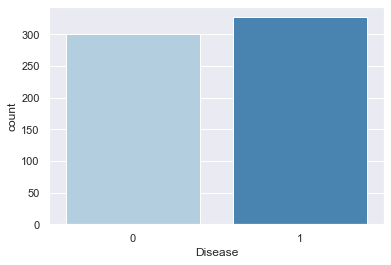

In [56]:
ax = sns.countplot(x = y_train, palette = 'Blues')

***

<a class="anchor" id="ModelCreation">
    
# 4. Model Creation

</a>

***
<ul>
    <li>Running Models in Training Environment</li>
    <li>Trainning our model</li>
    <li>Predict</li>
    <li>Get Coeficiente, Scores and Accuracy</li>
</ul>

***

***

<a class="anchor" id="LogisticRegr">
    
## 4.1 Logistic Regression Model

</a>

***
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

***
__Definition__

Logistic regression is another powerful supervised ML algorithm used for binary classification problems (when target is categorical). The best way to think about logistic regression is that it is a linear regression but for classification problems. Logistic regression essentially uses a logistic function defined below to model a binary output variable. The primary difference between linear regression and logistic regression is that logistic regression's range is bounded between 0 and 1. In addition, as opposed to linear regression, logistic regression does not require a linear relationship between inputs and output variables.

<img src='https://www.saedsayad.com/images/LogReg_1.png' width="571" height="306">
 
***
__Interpretation__

We define our model parameters as

> __Solver__- 'liblinear' because our data is a small data and liblinear solver is the indicated one for small datasets

> __random_state = 0__ : in logistic regression dont make any diference which is random state because score don't change
   

*** 

In [57]:
# Trainning our model

logistic_regression_model = LogisticRegression(random_state = 0,
                                               solver='liblinear')
logistic_regression_model.fit(X_train, y_train)

roc_Logistic_Regression = logistic_regression_model.fit(X_train, y_train)


In [58]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_logistic_regression = logistic_regression_model.predict(x_test)
y_pred_logistic_regression

# predict_proba - Probability estimates 

y_pred_proba_logistic_regression = logistic_regression_model.predict_proba(x_test)[::,1].copy()

# coef_ - Coefficient of the features in the decision function

coef_logistic_regression = logistic_regression_model.coef_


The Training Accuracy is:  0.85828025477707
The Testing Accuracy is:  0.7784810126582279

               precision    recall  f1-score   support

           0       0.82      0.72      0.77        80
           1       0.75      0.83      0.79        78

    accuracy                           0.78       158
   macro avg       0.78      0.78      0.78       158
weighted avg       0.78      0.78      0.78       158



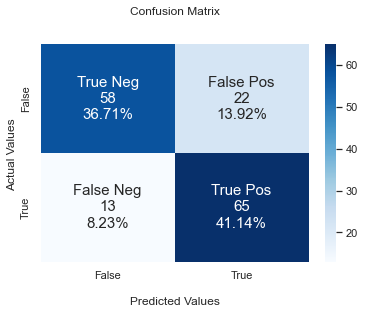

The True Positive Rate is:  [0.725      0.83333333]
The Average True Positive Rate is:  0.7791666666666667

This reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.

The Positive Precision Value is:  0.7791666666666667


In [59]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', logistic_regression_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', logistic_regression_model.score(x_test, y_test))

LRScore = logistic_regression_model.score(x_test, y_test).copy()

# Classification Report
print('\n',classification_report(y_test, y_pred_logistic_regression))

# Confusion Matrix function

cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_logistic_regression.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logistic_regression.flatten()/np.sum(cm_logistic_regression)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_logistic_regression, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_logistic_regression = cm_logistic_regression.sum(axis=0) - np.diag(cm_logistic_regression)

FN_logistic_regression = cm_logistic_regression.sum(axis=1) - np.diag(cm_logistic_regression)

TP_logistic_regression = np.diag(cm_logistic_regression)

TN_logistic_regression = cm_logistic_regression.sum() - (FP_logistic_regression - FN_logistic_regression - TP_logistic_regression)

# Sensitivity, hit rate, recall, or positive rate

TPR_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FN_logistic_regression)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_logistic_regression)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_logistic_regression.sum()/2)
print('\nThis reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.')

# Precision or positive predictive value

PPV_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FP_logistic_regression)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_logistic_regression.sum()/2)




***

<a class="anchor" id="DecisionTree">
    
## 4.2 Decision Tree Model

</a>

***
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

***

__Definition__

__Decision Trees__ (DTs) are a non-parametric supervised learning method used for classification and regression. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

<img src='https://365datascience.com/resources/blog/rr6cuudl59r-decision-trees-image1.png' width="1920" height="1080">

Once we are working with __Decision Trees__ we have to take in account 2 properties :
* __Low Bias__ - If i create a decision tree to its complete debth then what will happen is that will be properly trained for our train set, so trian error will be very low

* __High Variance__ - When we get our new test data those decision tree they are prone to give a larger amount of errors

> When we create a decision tree to is complete debth it leads to __overfitting__

***

__Interpretation__

We define our model parameters as

> __criterion = 'entropy'__ - criterion is the function to measure the quality of a split. Supported criteria are:
   
>> '__gini__' - 'Gini impurity' or 'mean decrease impurity' is defined as the total decrease in node impurity averaged over all trees of the ensemble.

>> '__entropy__' - 'Entropy' is one of the most important concepts in information theory, is a measure of the amount of disorder.

> __max_depth = 10__ - The maximum depth of the tree, is the maximum of a binary tree, is the number of nodes along the longest path from the root node down to the farthest leaf node.

> __min_samples_split = 2__ - The minimum number of samples required to split an internal node.

> __max_features = 'auto'__ - The number of features to consider when looking for the best split. Supported criteria are: 

>> __'auto', 'sqrt' or 'log2'__ = max_features=sqrt(n_features) 

>> __int__ - consider 'max_features at each split

>> __float__ - can be a fraction and results in (max_feactures * n_features)

> __class_weight = 'balanced'__ - Weights associated with classes. Supported criteria are:

>> __dict__ - Dictionary

>> __list__ - List

>> __'balanced'__ - it balances the class weight

> __min_samples_lead = 1__ - The minimum number of samples required to be at a leaf node.

>__radom_state = 0__ - random_state represents the 'sample' of data that classifier will take to work over it, random_state = 0 is always the same, as 1, as 2, as 3, are groups of data that will be measured and classified by the classifier. We used the 0 one. we analyse that 'sample' 13 is one of the samples that return 1 accuracy, which perform our model 100% success

*** 


In [60]:
# Trainning our model

decision_tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                             max_depth = 10,
                                             min_samples_split = 2,
                                             max_features = 'auto',
                                             class_weight = 'balanced',
                                             min_samples_leaf = 1,
                                             random_state = 0
                                            )
decision_tree_model.fit(X_train, y_train)

roc_Decision_Tree = decision_tree_model.fit(X_train, y_train)

In [61]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_decision_tree = decision_tree_model.predict(x_test)
y_pred_decision_tree

# predict_proba - Probability estimates 

y_pred_proba_decision_tree = decision_tree_model.predict_proba(x_test)[::,1].copy()

The Training Accuracy is:  0.9952229299363057
The Testing Accuracy is:  0.9556962025316456

               precision    recall  f1-score   support

           0       0.96      0.95      0.96        80
           1       0.95      0.96      0.96        78

    accuracy                           0.96       158
   macro avg       0.96      0.96      0.96       158
weighted avg       0.96      0.96      0.96       158



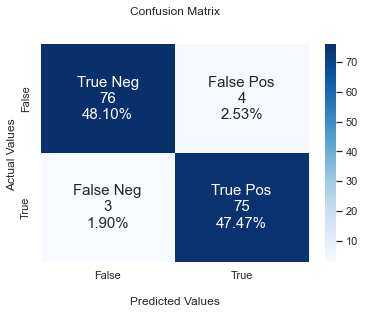

The True Positive Rate is:  [0.95       0.96153846]
The Average True Positive Rate is:  0.9557692307692307

The Positive Precision Value is:  0.9557692307692307


In [62]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', decision_tree_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', decision_tree_model.score(x_test, y_test))

DTScore = decision_tree_model.score(x_test, y_test).copy()

# Classification Report
print('\n',classification_report(y_test, y_pred_decision_tree))

# Confusion Matrix function

cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_decision_tree.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_decision_tree.flatten()/np.sum(cm_decision_tree)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_decision_tree, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_decision_tree = cm_decision_tree.sum(axis=0) - np.diag(cm_decision_tree)

FN_decision_tree = cm_decision_tree.sum(axis=1) - np.diag(cm_decision_tree)

TP_decision_tree = np.diag(cm_decision_tree)

TN_decision_tree = cm_decision_tree.sum() - (FP_decision_tree - FN_decision_tree - TP_decision_tree)

# Sensitivity, hit rate, recall, or positive rate

TPR_decision_tree = TP_decision_tree / (TP_decision_tree + FN_decision_tree)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_decision_tree)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_decision_tree.sum()/2)

# Precision or positive predictive value

PPV_decision_tree = TP_decision_tree / (TP_decision_tree + FP_decision_tree)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_decision_tree.sum()/2)

***

<a class="anchor" id="RandomForest">
    
## 4.3 Random Forest Model

</a>

***
<ul>
        <li>Grid Search Hyperparameter Tuning</li>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

***

__Definition__

__The random forest__ is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.
It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

Random Forest use a technique called __Ensemble Techniques__ named __Bagging__ or __bootstrap aggregation__, this technique consistes in train a particular dataset(named as train data) through several models, per each model it is provided a random sample of trian data, for model 1 sample 1, for model 2 sample 2 and so on, each model will provide a prediction, this test division by several models and by several samples ( which use a Row Sampling with Replacement ) is called __bootstrap__ after all models provide their results, assuming that is a binary test,  the final result is created based on the average of the results of all models, if the majority of the models results is 1 then the final prediction will be 1, this votation is called __aggregation__. 

In __Random forest__ all this Ensemble Technique is replaced by __decision trees__, it gives to each decision tree model a random sample of rows and features and predict by votation the final prediction, as we can check in the image below.

(file Emsemble in ML folder)

<img src='https://cdn.corporatefinanceinstitute.com/assets/random-forest.png' width="688" height="457">

When using Random Forest we are using several Decision Trees and we know that we are expose to __high variance__ and when we are combining all the trees to a single result we are transforming this high variance to a low variance.

One more advantage is, as more the samples distributed which lead to more decision trees which will lead to more high variance it will always lead to a low variance. 

Suposing that we are no working in a binary classification but is a regression problem, the only diference is that __aggregation__ is made not over the majority of the reults but over the Mean or the Medium 

This is way this model works so well in the mojority of the machine learning predictions.


***

__Interpretation__

We define our model parameters as

> __criterion = 'entropy'__ - criterion is the function to measure the quality of a split. Supported criteria are:
   
>> '__gini__' - 'Gini impurity' or 'mean decrease impurity' is defined as the total decrease in node impurity averaged over all trees of the ensemble.

>> '__entropy__' - 'Entropy' is one of the most important concepts in information theory, is a measure of the amount of disorder.

> __max_depth = 10__ - The maximum depth of the tree, is the maximum of a binary tree, is the number of nodes along the longest path from the root node down to the farthest leaf node.

> __min_samples_split = 2__ - The minimum number of samples required to split an internal node.

> __max_features = 'auto'__ - The number of features to consider when looking for the best split. Supported criteria are: 

>> __'auto', 'sqrt' or 'log2'__ = max_features=sqrt(n_features) 

>> __int__ - consider 'max_features at each split

>> __float__ - can be a fraction and results in (max_feactures * n_features)

> __bootstrap = False__ - Whether bootstrap samples are used when building trees. If False, the
    whole dataset is used to build each tree. Bootstrapping is a statistical resampling technique that involves random sampling of a dataset with replacement. It is often used as a means of quantifying the uncertainty associated with a machine learning model. While tuning the hyperparameters of our model to our dataset, we consistently find that setting bootstrap=False results in a better model

>> __True__ - Will not use the whole dataset to build each tree

>> __False__ - Will use the whole dataset to build each tree

> __oob_score = False__ - Whether to use out-of-bag samples to estimate the generalization score. is the average error for each calculated using predictions from the trees that do not contain in their respective bootstrap sample. Only available if bootstrap=True, once our bootstrap is False then oob_score is also False

>> __True__ - Will use out-of-bag samples to estimate the generalization score

>> __False__ - Will not use out-of-bag samples to estimate the generalization score

> __warm_start = False__ - If it is set to True, it permits the use of the existing fitted model attributes to initialize a new model in a subsequent call to fit. If True reuse the solution of the previous call to fit and add more estimators to the ensemble 

>> __True__ - Will reuse the solution of the previous call to fit and add more estimators to the ensemble

>> __False__ - Will not reuse the solution of the previous call to fit and add more estimators to the ensemble

> __class_weight = 'balanced'__ - Weights associated with classes. Supported criteria are:

>> __dict__ - Dictionary

>> __list__ - List

>> __'balanced'__ - it balances the class weight

> __min_samples_lead = 1__ - The minimum number of samples required to be at a leaf node.

>__radom_state = 0__ - random_state represents the 'sample' of data that classifier will take to work over it, random_state = 0 is always the same, as 1, as 2, as 3, are groups of data that will be measured and classified by the classifier. We used the 0 one. we analyse that 'sample' 0 is one of the samples that return 1 accuracy, which perform our model 100% success

*** 

In [63]:
# Trainning our model

random_forest_model = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 10,
                                 min_samples_split = 2,
                                 max_features = 'auto',
                                 bootstrap = False,
                                 oob_score = False,
                                 warm_start = False,
                                 class_weight = 'balanced',
                                 min_samples_leaf = 1,
                                 random_state = 0,
                                 )

random_forest_model.fit(X_train, y_train)

roc_Random_Forest = random_forest_model.fit(X_train, y_train)


In [64]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_random_forest = random_forest_model.predict(x_test)
y_pred_random_forest

# predict_proba - Probability estimates 

y_pred_proba_random_forest = random_forest_model.predict_proba(x_test)[::,1].copy()

# Results of Test
Predict = random_forest_model.predict(test_df).copy()

The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        78

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



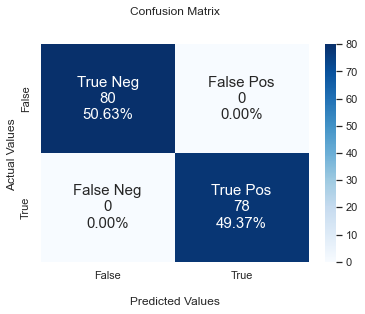

The True Positive Rate is:  [1. 1.]
The Average True Positive Rate is:  1.0

The Positive Precision Value is:  1.0


In [65]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', random_forest_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', random_forest_model.score(x_test, y_test))

RFScore = random_forest_model.score(x_test, y_test).copy()

# Classification Report
print('\n',classification_report(y_test, y_pred_random_forest))

# Confusion Matrix function

cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_random_forest.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_random_forest.flatten()/np.sum(cm_random_forest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_random_forest, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_random_forest = cm_random_forest.sum(axis=0) - np.diag(cm_random_forest)

FN_random_forest = cm_random_forest.sum(axis=1) - np.diag(cm_random_forest)

TP_random_forest = np.diag(cm_random_forest)

TN_random_forest = cm_random_forest.sum() - (FP_random_forest - FN_random_forest - TP_random_forest)

# Sensitivity, hit rate, recall, or positive rate

TPR_random_forest = TP_random_forest / (TP_random_forest + FN_random_forest)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_random_forest)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_random_forest.sum()/2)

# Precision or positive predictive value

PPV_random_forest = TP_random_forest / (TP_random_forest + FP_random_forest)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_random_forest.sum()/2)

***

<a class="anchor" id="Normalization">
    
# 5 Data Normalization

</a>

***

__What is normalization?__

Normalization is a general term related to the scaling of the variables. Scaling transforms a set of variables into a new set of variables that have the same order of magnitude. It’s usually a linear transformation, so it doesn’t affect the correlation or the predictive power of the features.

Why do we need to normalize our data? Because some models are sensitive to the order of magnitude of the features. If a feature has an order of magnitude equal to 1000, for example, and another feature has an order of magnitude equal to 10, some models may “think” that the first feature is more important than the second one. It’s obviously a bias, because the order of magnitude doesn’t give us any information about the predictive power. So, we need to remove this bias by transforming the variables to give them the same order of magnitude. This is the role of the scaling transformations.

Such transformations can be normalization (which transforms each variable into a 0–1 interval) and standardization (which transforms each variable into a 0-mean and unit variance variable)

<img src='https://miro.medium.com/max/744/1*HW7-kYjj6RKwrO-5WTLkDA.png' width="744" height="342">

***

__List of models that require data normalization:__

> __Linear models__

>> __All the linear models excluding linear regression__ actually require normalization. Lasso, Ridge and Elastic Net regressions are powerful models, but they require normalization because the penalty coefficients are the same for all the variables.

>>__Logistic regression__ requires normalization as well in order to avoid the vanishing gradient problem during the training phase.

>> If we train a linear regression without previous normalization, we can’t use the coefficients as indicators of feature importance. If we need to perform feature importance (for example, for dimensionality reduction purposes), we must normalize our dataset in advance, even if we work with a simple linear regression.

>> Although we calculated feature importance by decision tree which doesn't require normalization.

<img src='https://miro.medium.com/max/725/1*QY3CSyA4BzAU6sEPFwp9ZQ.png' width="500" height="500">



> __Support Vector Machines__

>> __Support Vector Machines__ are powerful models based on distances. They try to find a hyperplane in the vector space of the features that is able to linearly separate the training records according to the value of the target variable.
With some changes, SVM can be used even with non-linear functions and for regression purposes.
Since distances are very sensitive to the order of magnitude of the features, it’s necessary to apply scaling transformations for SVM as well.

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTi8cnbO7Zs9ZOcu6mzy5vOhp0MhiljMwNcVFiaLr_wdb4TLK-W4lGn9KC622kR-PdlAVc&usqp=CAU' width="450" height="500">


> __k-nearest neighbors (KNN)__

>> __KNN__ is a very popular algorithm based on distances (typically Euclidean distance). The prediction considers the k nearest neighbors to a given point in the space of the features. Just like SVM, even KNN requires working with normalized data

<img src='https://www.researchgate.net/publication/339345022/figure/fig1/AS:860111803252737@1582078042974/k-nearest-neighbor-diagram-When-the-value-of-k-is-different-the-samples-are-judged.ppm' width="479" height="359">


> __Neural networks__

>> __Neural networks__ are very sensitive to the order of magnitude of the features. The activation functions always require normalized data, otherwise the training phase will suffer from the vanishing Gradient problem just like the logistic regression.

<img src='https://cdn-images-1.medium.com/max/1024/1*HByuNjKgdVf9LaV_g4fZzA.png' width="450" height="500">




Now that we get to conclusion that data requires normalization for the further models lets check which scaler is the more accurate one for our data. 


***

<a class="anchor" id="MLP">
    
## 5.1 MLP Classifier

</a>

***
__Interpretation__

>__MLPClassifier__ stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

<img src='https://dz2cdn1.dzone.com/storage/temp/3627042-mlp-network.png' width="597" height="324">



In [66]:
MLPclassifier_check = MLPClassifier().fit(X_train, y_train)
MLPclassifier_check.score(x_test, y_test)

0.689873417721519

***

<a class="anchor" id="MinMaxSc">
    
## 5.2 Min Max Scaler

</a>

***
__Interpretation__

> Another way to normalize the input features/variables (apart from the standardization that scales the features so that they have μ=0and σ=1) is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

>> One important thing to keep in mind when using the MinMax Scaling is that it is highly influenced by the maximum and minimum values in our data so if our data contains outliers it is going to be biased.

>> MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. This is done feature-wise in an independent way.

>> The MinMaxScaler scaling might compress all inliers in a narrow range.

<img src='https://miro.medium.com/max/1400/1*EvtTPZ7BtvvIlt4muuBeEA.png' width="1400" height="694">



In [67]:
min_max = MinMaxScaler().fit(X_train)
min_max_X_train = min_max.transform(X_train)
min_max_x_test = min_max.transform(x_test)
model_min_max = MLPClassifier().fit(min_max_X_train, y_train)
model_min_max.score(min_max_x_test, y_test)

0.8354430379746836

***

<a class="anchor" id="RescaleBetwe">
    
### 5.2.1 Rescale Between [-1,1]

</a>

***
__Interpretation__

> Works exactly as the MinMaxScaler but instead of transform all features into the range [0,1] will transform those into the range of [-1,1] meaning that the minimum and maximum value of a feature/variable is going to be -1 and 1, respectively

In [68]:
min_max2 = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
min_max2_X_train = min_max2.transform(X_train)
min_max2_x_test = min_max2.transform(x_test)
model_min_max2 = MLPClassifier().fit(min_max2_X_train, y_train)
model_min_max2.score(min_max2_x_test, y_test)

0.8924050632911392

***

<a class="anchor" id="RobustSc">
    
## 5.3 The RobustScaler

</a>

***
__Interpretation__

> Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

> RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value)

<img src='https://scikit-learn.org/0.18/_images/sphx_glr_plot_robust_scaling_001.png' width="1200" height="400">


In [69]:
robust = RobustScaler().fit(X_train)
robust_X_train = robust.transform(X_train)
robust_X_test = robust.transform(x_test)
model_robust = MLPClassifier().fit(robust_X_train, y_train)
model_robust.score(robust_X_test, y_test)

0.8987341772151899

***

<a class="anchor" id="NormalConclusi">
    
## 5.4 Normalization Conclusion

</a>

***
__Interpretation__

> __After check the diferent scalling techniques, the MinMax [0, 1] Scaler had better scores in average of the cases. It'll be used MinMax [0, 1] Scaler.__

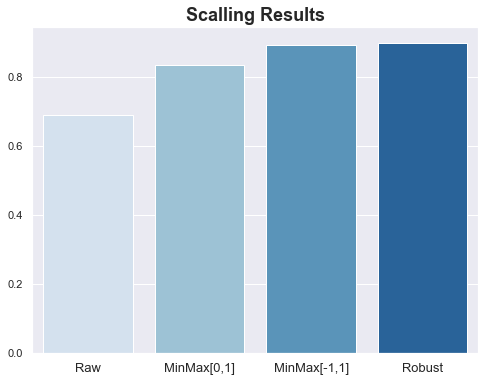

In [70]:
x = ['Raw','MinMax[0,1]','MinMax[-1,1]','Robust']
y = [MLPclassifier_check.score(x_test, y_test),
     model_min_max.score(min_max_x_test, y_test), 
     model_min_max2.score(min_max2_x_test, y_test),
     model_robust.score(robust_X_test, y_test)]

# Plot
plt.figure(figsize = (8,6))
sns.barplot(x, y,palette='Blues')

# Layout
plt.title('Scalling Results', fontsize = 18, fontweight='bold')
plt.xticks(fontsize = 13)

plt.show()

In [71]:
# Normalizing data
train_scaler = MinMaxScaler(feature_range = (-1, 1)).fit_transform(X_train)
test_scaler = MinMaxScaler(feature_range = (-1, 1)).fit_transform(x_test)

X_train[X_train.columns] = train_scaler
x_test[x_test.columns] = test_scaler

***

<a class="anchor" id="NormalizedModelCreation">
    
# 6. Normalized Model Creation

</a>

***

*** 
<a class="anchor" id="KNN">
    
## 6.1 K Nearest Neighbors Model (KNN)

</a>

***

    
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

***

__Definition__

The __k-nearest neighbors algorithm__, also known as __KNN or k-NN__, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. Working off the assumption that similar points can be found near one another.

<img src='https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif' width="940" height="720">

***

__Interpretation__

We define our model parameters as

> __n_neighbors = 5__ - Number of neighbors to use by default, this are the closest neighbors to compare. 

> __leaf_size = 1__ - Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem. The leaf size controls the minimum number of points in a given node.

> __p = 1__ - Power parameter for the Minkowski metric.

>> __The Minkowski distance__ or __Minkowski metric__ is a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance
Manhattan distance captures the distance between two points by aggregating the pairwise absolute difference between each variable while Euclidean distance captures the same by aggregating the squared difference in each variable. The supported criteria are:

>> __P = 1 = Manhattan Distance__ - Captures the distance between two points by aggregating the pairwise absolute difference between each variable

>> __P = 2 = Euclidean Distance__ - Captures the distance between two points by aggregating the squared difference in each variable

>> Is the Euclidean distance ever greater than the Manhattan distance? No. Euclidean is a *lower bound*. It always underestimates the distance you must travel, since you can't go in a straight line or pass through walls. Although the manhattan distance with the matrix method has better performance than the euclidean distance method.

<img src='https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=jpeg' width="425" height="272">


> '__weights = 'distance__' - measures relevance of neighbors with the point. the supports criteria are:

>> __uniform__ - All points in each neighborhood are weighted equally.

>> __distance__ - weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

> __algorithm = 'auto'__ - Algorithm used to compute the nearest neighbors.

>> __auto__ - will attempt to decide the most appropriate algorithm based on the values passed. 

>> __ball_tree__ - will decide by analysing groups through root ball and subsquent balls

<img src='https://www.researchgate.net/publication/351985320/figure/fig1/AS:1029206997737472@1622393478361/An-example-of-the-ball-tree-All-points-will-be-finally-assigned-to-a-leaf-node.png' width="500" height="420">

>> __kd_tree__ - will decide by analysing groups through squares and subsquent squares

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2017/11/26205618/image038.png' width="400" height="420">

>> __brute__ - A brute force approach is an approach that finds all the possible solutions to find a satisfactory solution to a given problem. Another example is to make an attempt to break the 5 digit password; then brute force may take up to 105 attempts to crack the code

*** 


In [72]:
# Trainning our model
    # p = 1 - Manhatan Distance; 2 - Euclidean Distance

KNN_model = KNeighborsClassifier(n_neighbors = 5,
                                 leaf_size = 1,
                                 p = 1,
                                 weights = 'distance',
                                 algorithm = 'auto',
                                 )
KNN_model.fit(X_train, y_train)

roc_Knn = KNN_model.fit(X_train, y_train)

In [73]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_KNN_model = KNN_model.predict(x_test)
y_pred_KNN_model

# predict_proba - Probability estimates 

y_pred_proba_KNN_model = KNN_model.predict_proba(x_test)[::,1].copy()


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9367088607594937

               precision    recall  f1-score   support

           0       0.95      0.93      0.94        80
           1       0.93      0.95      0.94        78

    accuracy                           0.94       158
   macro avg       0.94      0.94      0.94       158
weighted avg       0.94      0.94      0.94       158



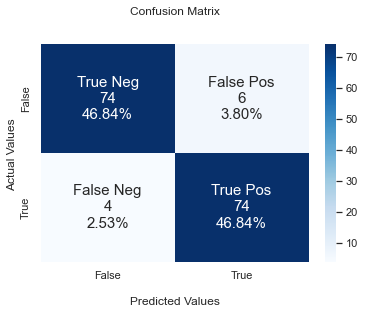

The True Positive Rate is:  [0.925      0.94871795]
The Average True Positive Rate is:  0.9368589743589744

The Positive Precision Value is:  0.9368589743589744


In [74]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', KNN_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', KNN_model.score(x_test, y_test))

KNNScore = KNN_model.score(x_test, y_test).copy()

# Classification Report
print('\n',classification_report(y_test, y_pred_KNN_model))

# Confusion Matrix function

cm_KNN_model = confusion_matrix(y_test, y_pred_KNN_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_KNN_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_KNN_model.flatten()/np.sum(cm_KNN_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_KNN_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_KNN_model = cm_KNN_model.sum(axis=0) - np.diag(cm_KNN_model)

FN_KNN_model = cm_KNN_model.sum(axis=1) - np.diag(cm_KNN_model)

TP_KNN_model = np.diag(cm_KNN_model)

TN_KNN_model = cm_KNN_model.sum() - (FP_KNN_model - FN_KNN_model - TP_KNN_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_KNN_model = TP_KNN_model / (TP_KNN_model + FN_KNN_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_KNN_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_KNN_model.sum()/2)

# Precision or positive predictive value

PPV_KNN_model = TP_KNN_model / (TP_KNN_model + FP_KNN_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_KNN_model.sum()/2)

*** 
<a class="anchor" id="NeuralNet">
    
## 6.2 Neural Network

</a>

***

<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

***

__Definition__

A __neural network__ is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain.

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

<img src='https://community.alteryx.com/t5/image/serverpage/image-id/42339i8BA3F2CCCEDE7458?v=v2' width="940" height="720">

***

__Interpretation__

We define our model parameters as

> __activation = 'tanh'__ - Activation function for the hidden layer.

>> __'identity'__ - no-op activation, useful to implement linear bottleneck, returns f(x) = x

>> __'logistic'__ - the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x))

>> __'tanh'__ - the hyperbolic tan function, returns f(x) = tanh(x)

>> __'relu'__ - the rectified linear unit function, returns f(x) = max(0, x)

> __solver__ - The solver for weight optimization.

>> __'lbfgs'__ - is an optimizer in the family of quasi-Newton methods. For small datasets, however, 'lbfgs' can converge faster and perform better.

>> __'sgd'__ - refers to stochastic gradient descent.

>> __'adam'__ - refers to a stochastic gradient-based optimizer, works pretty well on relatively
    large datasets (with thousands of training samples or more) in terms of
    both training time and validation score.

> __learning_rate_init = 0.0505__ - The initial learning rate used. It controls the step-size
    in updating the weights. Only used when solver='sgd' or 'adam' 

> __learning_rate = 'constant'__ - Learning rate schedule for weight updates

>>  __'constant'__ - is a constant learning rate given by 'learning_rate_init'

>> __'invscaling'__ - gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)

>> __'adaptive'__ - keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing.

> __radom_state = 33__ - random_state represents the 'sample' of data that classifier will take to work over it, random_state = 0 is always the same, as 1, as 2, as 3, are groups of data that will be measured and classified by the classifier.

***

In [75]:
NeuralNet_model = MLPClassifier(activation = 'tanh',
                        hidden_layer_sizes = 75, 
                        learning_rate = 'constant', 
                        learning_rate_init = .0505, 
                        solver = 'adam', 
                        random_state = 0
                        )
NeuralNet_model.fit(X_train, y_train)

roc_NeuralNet = NeuralNet_model.fit(X_train, y_train)


In [76]:
y_pred_NeuralNet_model = NeuralNet_model.predict(x_test)
y_pred_NeuralNet_model

# predict_proba - Probability estimates 

y_pred_proba_NeuralNet_model = NeuralNet_model.predict_proba(x_test)[::,1].copy()

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9556962025316456

               precision    recall  f1-score   support

           0       0.94      0.97      0.96        80
           1       0.97      0.94      0.95        78

    accuracy                           0.96       158
   macro avg       0.96      0.96      0.96       158
weighted avg       0.96      0.96      0.96       158



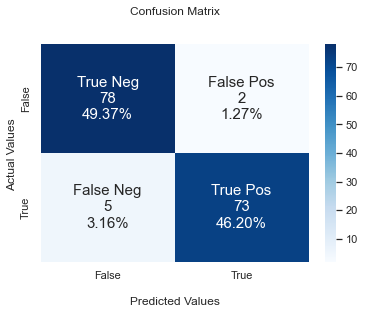

The True Positive Rate is:  [0.975      0.93589744]
The Average True Positive Rate is:  0.9554487179487179

The Positive Precision Value is:  0.9554487179487179


In [77]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', NeuralNet_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', NeuralNet_model.score(x_test, y_test))

NNScore = NeuralNet_model.score(x_test, y_test).copy()

# Classification Report
print('\n',classification_report(y_test, y_pred_NeuralNet_model))

# Confusion Matrix function

cm_NeuralNet_model = confusion_matrix(y_test, y_pred_NeuralNet_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_NeuralNet_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_NeuralNet_model.flatten()/np.sum(cm_NeuralNet_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_NeuralNet_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_NeuralNet_model = cm_NeuralNet_model.sum(axis=0) - np.diag(cm_NeuralNet_model)

FN_NeuralNet_model = cm_NeuralNet_model.sum(axis=1) - np.diag(cm_NeuralNet_model)

TP_NeuralNet_model = np.diag(cm_NeuralNet_model)

TN_NeuralNet_model = cm_NeuralNet_model.sum() - (FP_NeuralNet_model - FN_NeuralNet_model - TP_NeuralNet_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_NeuralNet_model = TP_NeuralNet_model / (TP_NeuralNet_model + FN_NeuralNet_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_NeuralNet_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_NeuralNet_model.sum()/2)

# Precision or positive predictive value

PPV_NeuralNet_model = TP_NeuralNet_model / (TP_NeuralNet_model + FP_NeuralNet_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_NeuralNet_model.sum()/2)

*** 
<a class="anchor" id="Gradient">
    
## 6.3 Gradient Boosting

</a>

***

<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

***

__Definition__

__Gradient boosting__ is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. How are the targets calculated? The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error:

If a small change in the prediction for a case causes a large drop in error, then next target outcome of the case is a high value. Predictions from the new model that are close to its targets will reduce the error.

<img src='http://uc-r.github.io/public/images/analytics/gbm/boosted_stumps.gif' width="500" height="500">

***

__Interpretation__

We define our model parameters as

> __loss = 'deviance'__ - The loss function to be optimized

>> __'deviance'__ - 'deviance' refers to deviance (= logistic regression) for classification with probabilistic outputs

>> __'exponential'__ - For loss 'exponential' gradient boosting recovers the AdaBoost algorithm

>>> __AdaBoost__ can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level

> __criterion__ - The function to measure the quality of a split

***

In [78]:
# Creating GBC Model
GradientBoosting_model = GradientBoostingClassifier(loss = 'deviance',
                                      criterion = 'squared_error',
                                      warm_start = True,
                                      init = 'zero',
                                      n_estimators = 500,
                                      max_features = 5,
                                      learning_rate = 1,
                                      max_depth = 29, 
                                      min_samples_split = .325,
                                      min_samples_leaf = .1,
                                      random_state = 0
                                    ) 
GradientBoosting_model.fit(X_train, y_train)

roc_GradientBoosting = GradientBoosting_model.fit(X_train, y_train)

In [79]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_GradientBoosting_model = GradientBoosting_model.predict(x_test)
y_pred_GradientBoosting_model

# predict_proba - Probability estimates 

y_pred_proba_GradientBoosting_model = GradientBoosting_model.predict_proba(x_test)[::,1].copy()


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.8734177215189873

               precision    recall  f1-score   support

           0       0.88      0.86      0.87        80
           1       0.86      0.88      0.87        78

    accuracy                           0.87       158
   macro avg       0.87      0.87      0.87       158
weighted avg       0.87      0.87      0.87       158



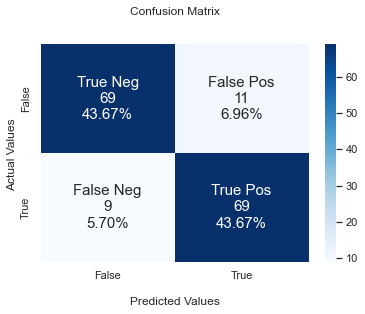

The True Positive Rate is:  [0.8625     0.88461538]
The Average True Positive Rate is:  0.8735576923076923

The Positive Precision Value is:  0.8735576923076923


In [80]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', GradientBoosting_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', GradientBoosting_model.score(x_test, y_test))

GBoostScore = GradientBoosting_model.score(x_test, y_test).copy()

# Classification Report
print('\n',classification_report(y_test, y_pred_GradientBoosting_model))

# Confusion Matrix function

cm_GradientBoosting_model = confusion_matrix(y_test, y_pred_GradientBoosting_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_GradientBoosting_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_GradientBoosting_model.flatten()/np.sum(cm_GradientBoosting_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_GradientBoosting_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_GradientBoosting_model = cm_GradientBoosting_model.sum(axis=0) - np.diag(cm_GradientBoosting_model)

FN_GradientBoosting_model = cm_GradientBoosting_model.sum(axis=1) - np.diag(cm_GradientBoosting_model)

TP_GradientBoosting_model = np.diag(cm_GradientBoosting_model)

TN_GradientBoosting_model = cm_NeuralNet_model.sum() - (FP_GradientBoosting_model - FN_GradientBoosting_model - TP_GradientBoosting_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_GradientBoosting_model = TP_GradientBoosting_model / (TP_GradientBoosting_model + FN_GradientBoosting_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_GradientBoosting_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_GradientBoosting_model.sum()/2)

# Precision or positive predictive value

PPV_GradientBoosting_model = TP_GradientBoosting_model / (TP_GradientBoosting_model + FP_GradientBoosting_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_GradientBoosting_model.sum()/2)

*** 
<a class="anchor" id="Accuracies">
    
## 7. Models Accuracies

</a>

***

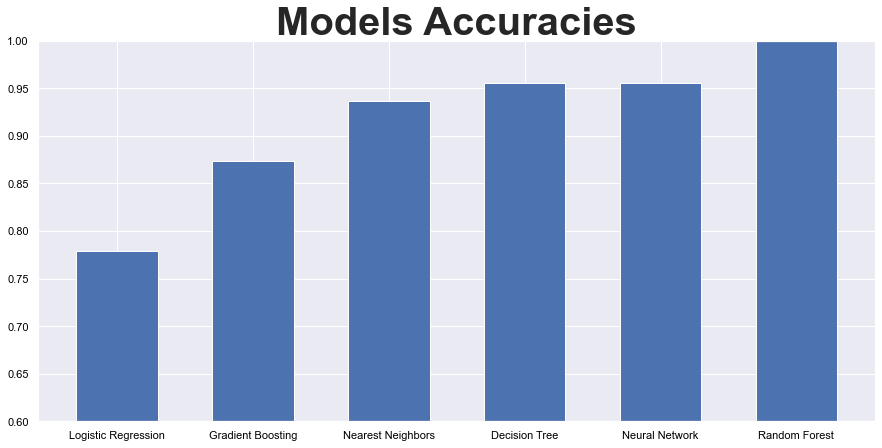

In [81]:
accuracies = [LRScore, DTScore, RFScore, KNNScore, NNScore, GBoostScore]
models = ["Logistic Regression","Decision Tree","Random Forest","Nearest Neighbors","Neural Network","Gradient Boosting"]
data_tuples = list(zip(models, accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)

plt.figure(figsize=(15,7))
plt.bar(data[0], data[1], width = 0.6)
plt.xticks(rotation=0)
plt.xticks(color='black')
plt.yticks(color='black')
plt.ylim(0.6, 1)
plt.title('Models Accuracies',fontsize = 40, fontweight = 'bold')

plt.show()

***
<a class="anchor" id="Roc">
    
## 8. Roc Curves Analysis

</a>
   
***
__Interpretation__

ROC or Receiver Operating Characteristic plot is used to visualise the performance of a binary classifier. It gives us the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.

In classification, there are many different evaluation metrics. The most popular is accuracy, which measures how often the model is correct. This is a great metric because it is easy to understand and getting the most correct guesses is often desired. There are some cases where you might consider using another evaluation metric.

Another common metric is AUC, area under the receiver operating characteristic (ROC) curve. The Reciever operating characteristic curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.



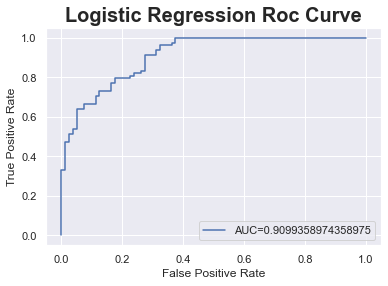

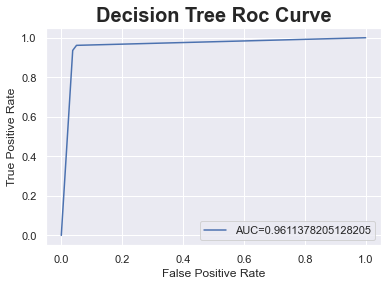

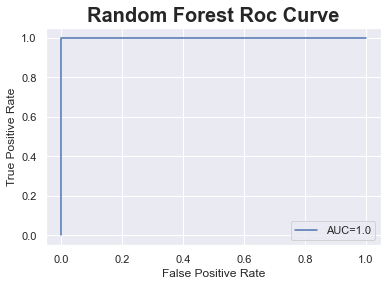

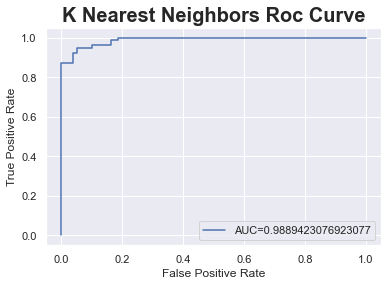

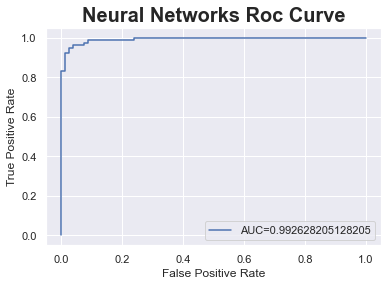

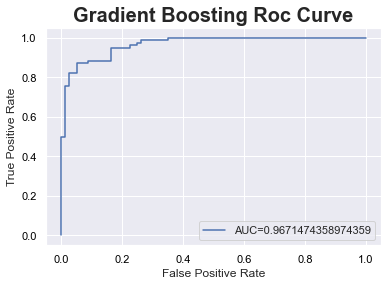

In [82]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_logistic_regression)
auc = metrics.roc_auc_score(y_test, y_pred_proba_logistic_regression)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression Roc Curve',fontsize = 20, fontweight = 'bold')
plt.legend(loc=4)
plt.show()


#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_decision_tree)
auc = metrics.roc_auc_score(y_test, y_pred_proba_decision_tree)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree Roc Curve',fontsize = 20, fontweight = 'bold')
plt.legend(loc=4)
plt.show()


#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_random_forest)
auc = metrics.roc_auc_score(y_test, y_pred_proba_random_forest)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest Roc Curve',fontsize = 20, fontweight = 'bold')
plt.legend(loc=4)
plt.show()


#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_KNN_model)
auc = metrics.roc_auc_score(y_test, y_pred_proba_KNN_model)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('K Nearest Neighbors Roc Curve',fontsize = 20, fontweight = 'bold')
plt.legend(loc=4)
plt.show()


#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_NeuralNet_model)
auc = metrics.roc_auc_score(y_test, y_pred_proba_NeuralNet_model)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Neural Networks Roc Curve',fontsize = 20, fontweight = 'bold')
plt.legend(loc=4)
plt.show()


#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_GradientBoosting_model)
auc = metrics.roc_auc_score(y_test, y_pred_proba_GradientBoosting_model)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xticks(color='black')
plt.yticks(color='black')
plt.title('Gradient Boosting Roc Curve',fontsize = 20, fontweight = 'bold')
plt.legend(loc=4)
plt.show()

***
<a class="anchor" id="Deployment">
    
## 9. Model Deployment

</a>
   
***

__Interpretation__

Will be used Random Forest Model to solve this binary problem, will result in a prediction of 100% certain.

In [83]:
df = pd.DataFrame()
df['PatientID'] = test_df.reset_index()['PatientID']
df['Disease'] = Predict
df

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0
...,...,...
220,1000,0
221,1256,1
222,1318,0
223,1953,1


In [84]:
df.to_csv('Group60_Predictions.csv', index = True)